# **Import Packages**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



# **Import Dataset**

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.head()

<ipython-input-2-f85af535cd90>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

# **Data Understanding**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
df.describe()

Unnamed: 0            id     member_id      loan_amnt  \
count  466285.000000  4.662850e+05  4.662850e+05  466285.000000   
mean   233142.000000  1.307973e+07  1.459766e+07   14317.277577   
std    134605.029472  1.089371e+07  1.168237e+07    8286.509164   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116571.000000  3.639987e+06  4.379705e+06    8000.000000   
50%    233142.000000  1.010790e+07  1.194108e+07   12000.000000   
75%    349713.000000  2.073121e+07  2.300154e+07   20000.000000   
max    466284.000000  3.809811e+07  4.086083e+07   35000.000000   

         funded_amnt  funded_amnt_inv       int_rate    installment  \
count  466285.000000    466285.000000  466285.000000  466285.000000   
mean    14291.801044     14222.329888      13.829236     432.061201   
std      8274.371300      8297.637788       4.357587     243.485550   
min       500.000000         0.000000       5.420000      15.670000   
25%      8000.000000      8000.000000      10.990000     256.690000   
50%     12000.000000     12000.000000      13.660000     379.890000   
75%     20000.000000     19950.000000      16.490000     566.580000   
max     35000.000000     35000.000000      26.060000    1409.990000   

         annual_inc            dti    delinq_2yrs  inq_last_6mths  \
count  4.662810e+05  466285.000000  466256.000000   466256.000000   
mean   7.327738e+04      17.218758       0.284678        0.804745   
std    5.496357e+04       7.851121       0.797365        1.091598   
min    1.896000e+03       0.000000       0.000000        0.000000   
25%    4.500000e+04      11.360000       0.000000        0.000000   
50%    6.300000e+04      16.870000       0.000000        0.000000   
75%    8.896000e+04      22.780000       0.000000        1.000000   
max    7.500000e+06      39.990000      29.000000       33.000000   

       mths_since_last_delinq  mths_since_last_record       open_acc  \
count           215934.000000            62638.000000  466256.000000   
mean                34.104430               74.306012      11.187069   
std                 21.778487               30.357653       4.987526   
min                  0.000000                0.000000       0.000000   
25%                 16.000000               53.000000       8.000000   
50%                 31.000000               76.000000      10.000000   
75%                 49.000000              102.000000      14.000000   
max                188.000000              129.000000      84.000000   

             pub_rec     revol_bal     revol_util      total_acc  \
count  466256.000000  4.662850e+05  465945.000000  466256.000000   
mean        0.160564  1.623020e+04      56.176947      25.064430   
std         0.510863  2.067625e+04      23.732628      11.600141   
min         0.000000  0.000000e+00       0.000000       1.000000   
25%         0.000000  6.413000e+03      39.200000      17.000000   
50%         0.000000  1.176400e+04      57.600000      23.000000   
75%         0.000000  2.033300e+04      74.700000      32.000000   
max        63.000000  2.568995e+06     892.300000     156.000000   

           out_prncp  out_prncp_inv    total_pymnt  total_pymnt_inv  \
count  466285.000000  466285.000000  466285.000000    466285.000000   
mean     4410.062342    4408.452258   11540.686220     11469.892747   
std      6355.078769    6353.198001    8265.627112      8254.157579   
min         0.000000       0.000000       0.000000         0.000000   
25%         0.000000       0.000000    5552.125349      5499.250000   
50%       441.470000     441.380000    9419.250943      9355.430000   
75%      7341.650000    7338.390000   15308.158460     15231.310000   
max     32160.380000   32160.380000   57777.579870     57777.580000   

       total_rec_prncp  total_rec_int  total_rec_late_fee     recoveries  \
count    466285.000000  466285.000000       466285.000000  466285.000000   
mean       8866.014657    2588.677225            0.650129      85.344211   
std        703

- Loan data consists of **466,285 rows** and **75 columns or features**.
- Loan data does **not yet have a target column**.


In [5]:
df["loan_status"].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [6]:
df["delinq_2yrs"].value_counts()

delinq_2yrs
0.0     382954
1.0      56224
2.0      16310
3.0       5684
4.0       2378
5.0       1236
6.0        629
7.0        346
8.0        177
9.0        111
10.0        65
11.0        41
12.0        38
13.0        25
14.0         8
15.0         7
18.0         6
16.0         5
17.0         3
19.0         3
21.0         2
22.0         2
29.0         1
24.0         1
Name: count, dtype: int64

In [7]:
df["delinq_2yrs"].replace(29, 24, inplace=True)

Create a target column or feature on the data
- "Good" for loan status "Fully Paid", "In Grace Period ", "Does not meet the credit policy. Status:Fully Paid", or "Current" and has a low "delinq_2yrs"..

- "Bad" for loan status "Charged Off", "Default" ,"Late (31-120 days)". "Does not meet the credit policy. Status:Charged Off", "Late (16-30 days)" or have a high "delinq_2yrs".

In [8]:
df['loan_risk'] = 'Good'
df.loc[df['loan_status'].isin(['Charged Off', 'Late (31-120 days)']), 'loan_risk'] = 'Bad'
df.loc[df['loan_status'].isin(['Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (16-30 days)']), 'loan_risk'] = 'Bad'
delinq_threshold = 2
df.loc[df['delinq_2yrs'] > delinq_threshold, 'loan_risk'] = 'Bad'

In [9]:
df[['delinq_2yrs', 'loan_status', 'loan_risk']].sample(5)

delinq_2yrs  loan_status loan_risk
162118          0.0      Current      Good
236517          0.0   Fully Paid      Good
202450          0.0   Fully Paid      Good
421282          0.0   Fully Paid      Good
116910          1.0  Charged Off       Bad

## Checking for Missing Value

In [10]:
df.isnull().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340304
purpose                             0
title                              21
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

In [11]:
# Checking columns that have missing values (%)
data_null = df.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(df))*100,2)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
data_null

feature  missing_value  percentage
0            mths_since_rcnt_il         466285      100.00
1                   open_rv_12m         466285      100.00
2                   open_il_24m         466285      100.00
3                   open_acc_6m         466285      100.00
4                  total_bal_il         466285      100.00
5     verification_status_joint         466285      100.00
6                     dti_joint         466285      100.00
7                       il_util         466285      100.00
8                   open_rv_24m         466285      100.00
9                    open_il_6m         466285      100.00
10                   max_bal_bc         466285      100.00
11                     all_util         466285      100.00
12             annual_inc_joint         466285      100.00
13                       inq_fi         466285      100.00
14                  total_cu_tl         466285      100.00
15                 inq_last_12m         466285      100.00
16                  open_il_12m         466285      100.00
17       mths_since_last_record         403647       86.57
18  mths_since_last_major_derog         367311       78.77
19                         desc         340304       72.98
20       mths_since_last_delinq         250351       53.69
21                 next_pymnt_d         227214       48.73
22                 tot_coll_amt          70276       15.07
23             total_rev_hi_lim          70276       15.07
24                  tot_cur_bal          70276       15.07
25                    emp_title          27588        5.92
26                   emp_length          21008        4.51
27                 last_pymnt_d            376        0.08
28                   revol_util            340        0.07
29   collections_12_mths_ex_med            145        0.03
30               inq_last_6mths             29        0.01
31                     open_acc             29        0.01
32                      pub_rec             29        0.01
33             earliest_cr_line             29        0.01
34                    total_acc             29        0.01
35                  delinq_2yrs             29        0.01
36           last_credit_pull_d             42        0.01
37               acc_now_delinq             29        0.01

## Checking for Duplicate Data

In [12]:
df.duplicated().sum()

0

## Checking for Imbalance Data

In [13]:
df["loan_risk"].value_counts()

loan_risk
Good    404585
Bad      61700
Name: count, dtype: int64

<ipython-input-14-0b9000e0f57f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["loan_risk"], palette = colors)


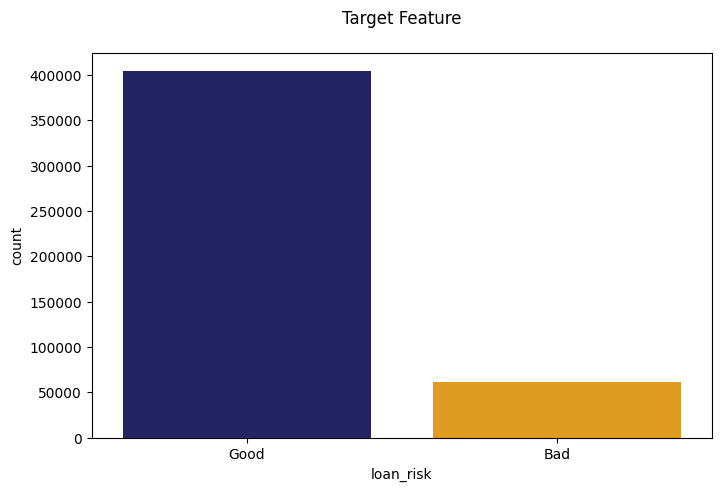

In [14]:
plt.figure(figsize = (8, 5))
colors = ['midnightblue', 'orange']
sns.countplot(x = df["loan_risk"], palette = colors)
plt.title("Target Feature\n", fontsize = 12)
plt.show()

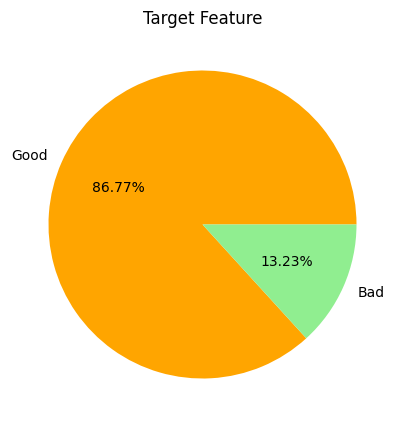

In [15]:
target = df['loan_risk'].value_counts()
label = target.index
plt.figure(figsize = (5, 5))
colors = ['orange', 'lightgreen']
plt.pie(target, labels = label, autopct = '%.2f%%', colors = colors)
plt.title('Target Feature')
plt.show()

# **Exploratory Data Analysis (EDA)**

In [16]:
# Group columns or features by type
cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

##Univariate Analysis

### Categorical Columns or Features

In [17]:
for col in cat:
  print(f"Counts of {col} Column")
  print(df[col].value_counts(), '\n')

Counts of term Column
term
 36 months    337953
 60 months    128332
Name: count, dtype: int64 

Counts of grade Column
grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64 

Counts of sub_grade Column
sub_grade
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: count, dtype: int64 

Counts of emp_title Column
emp_title
Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                              

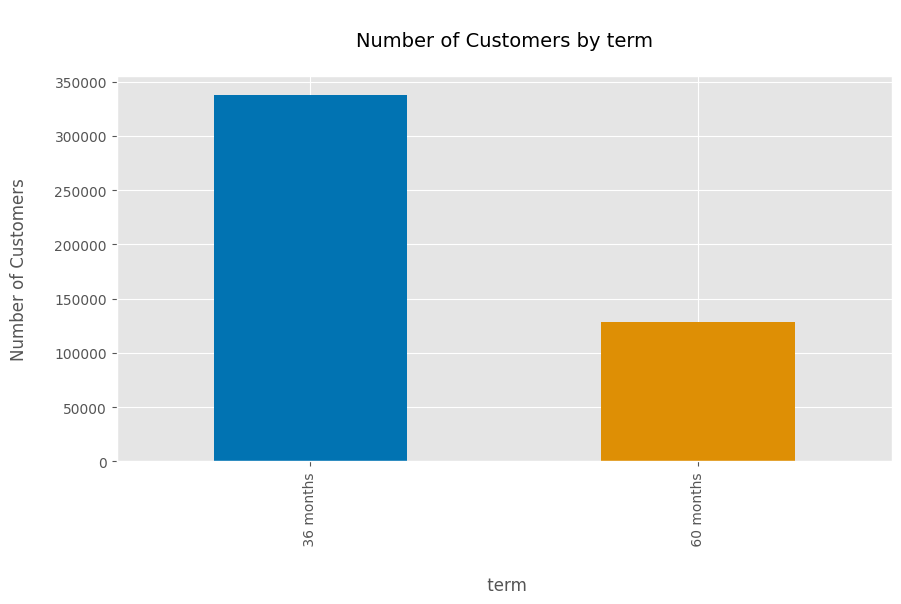

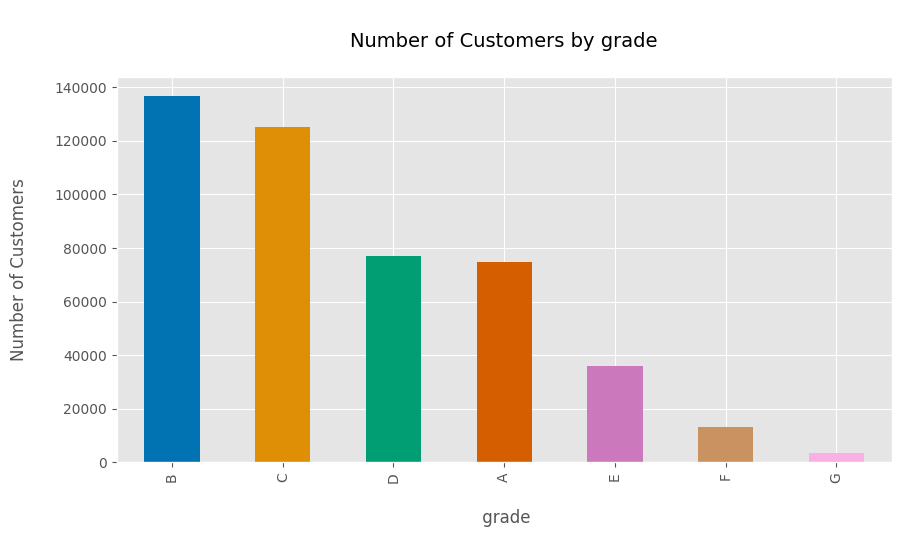

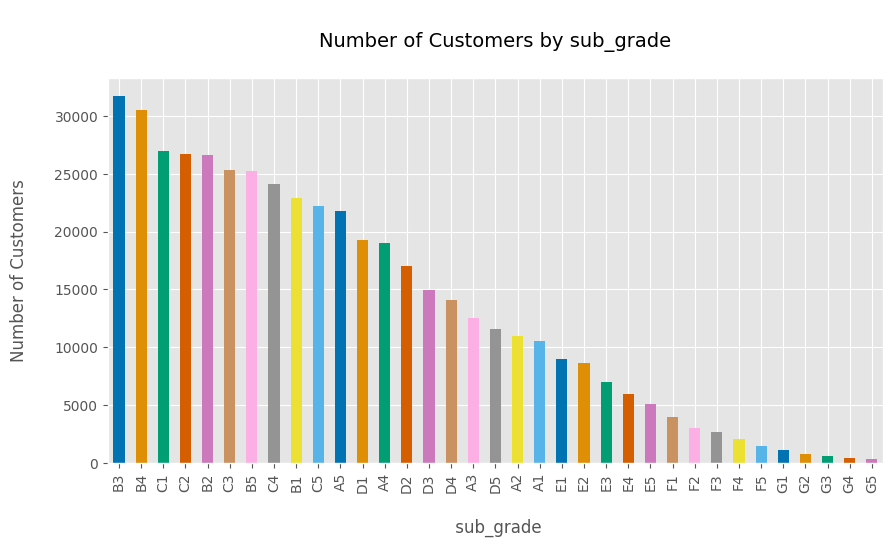

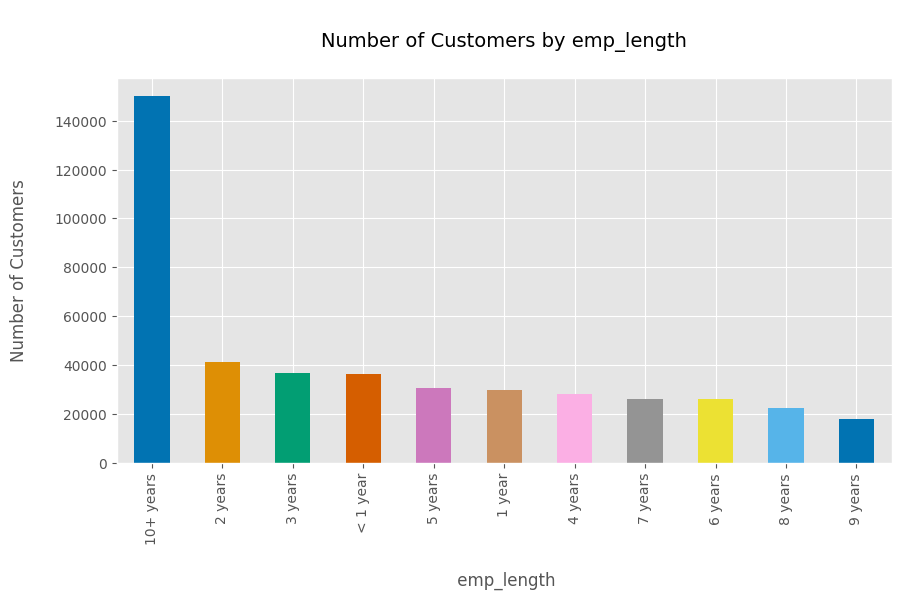

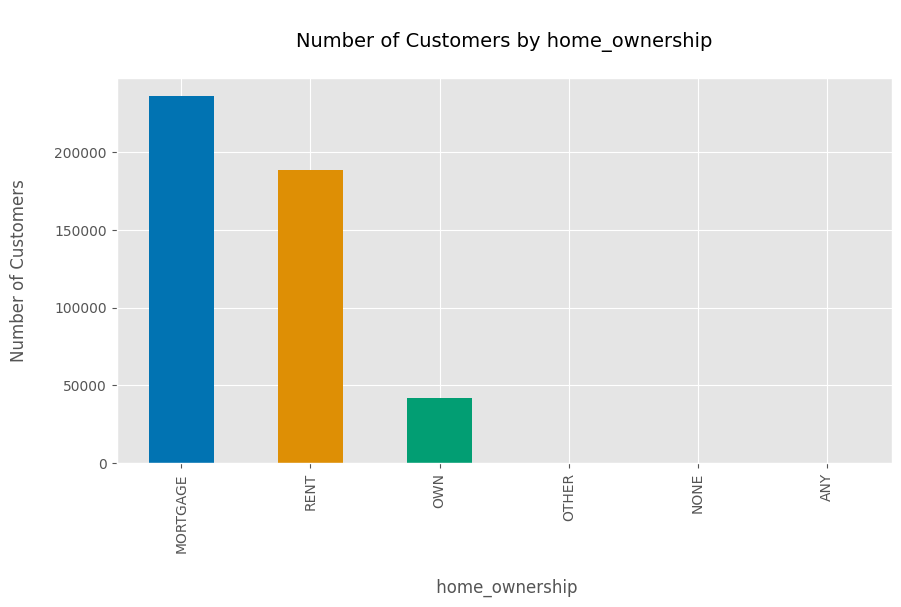

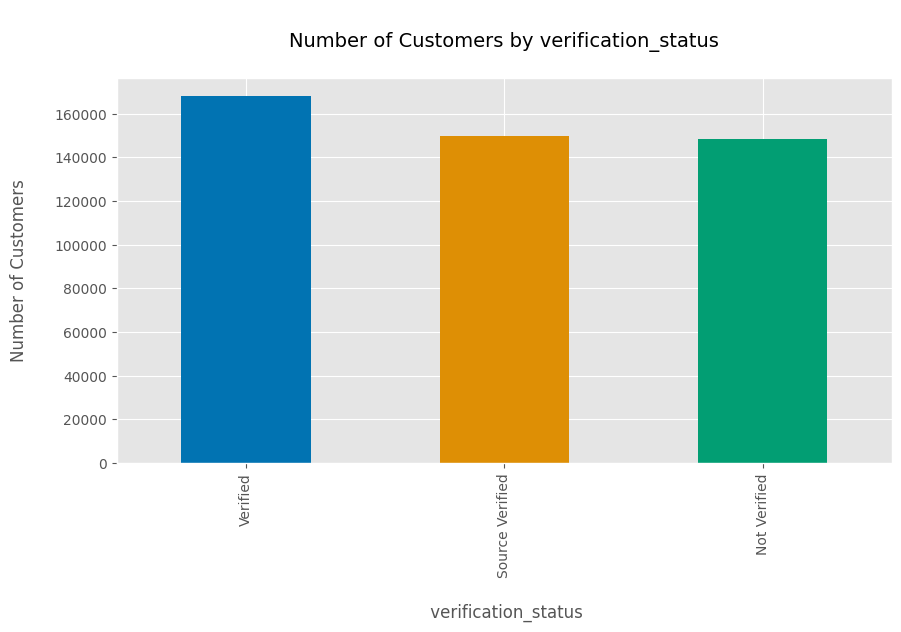

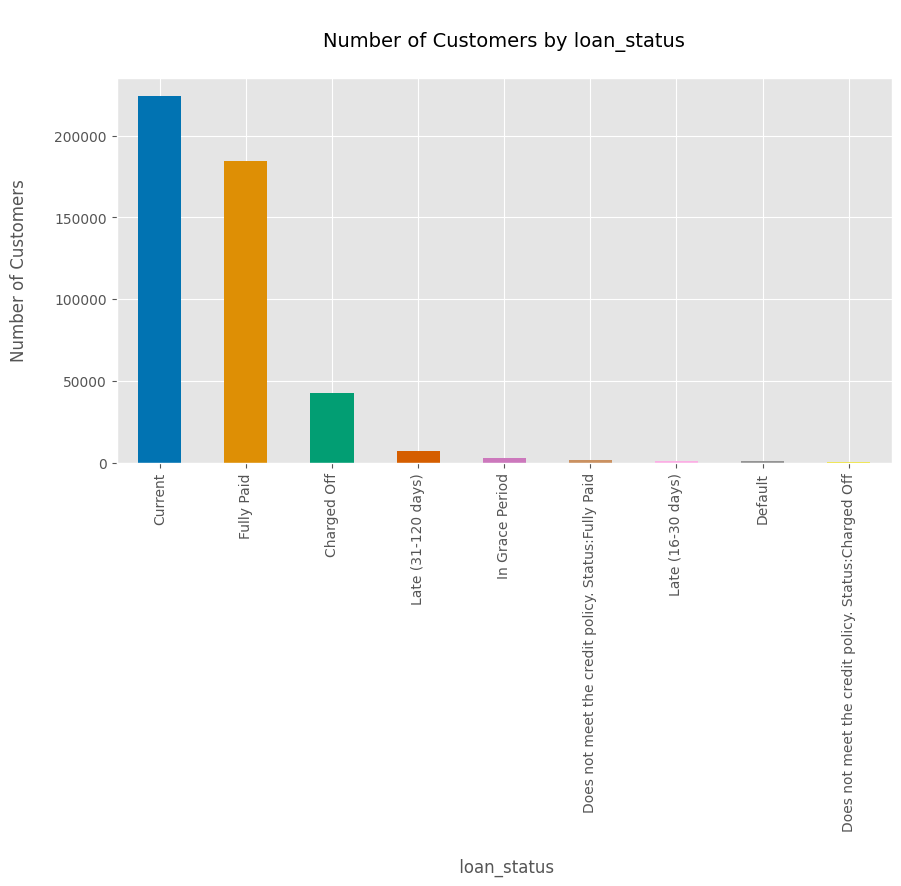

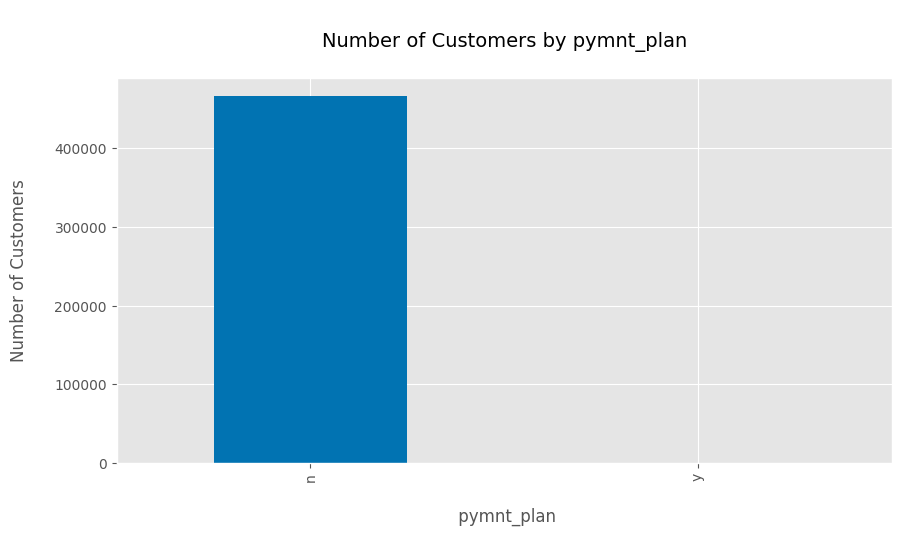

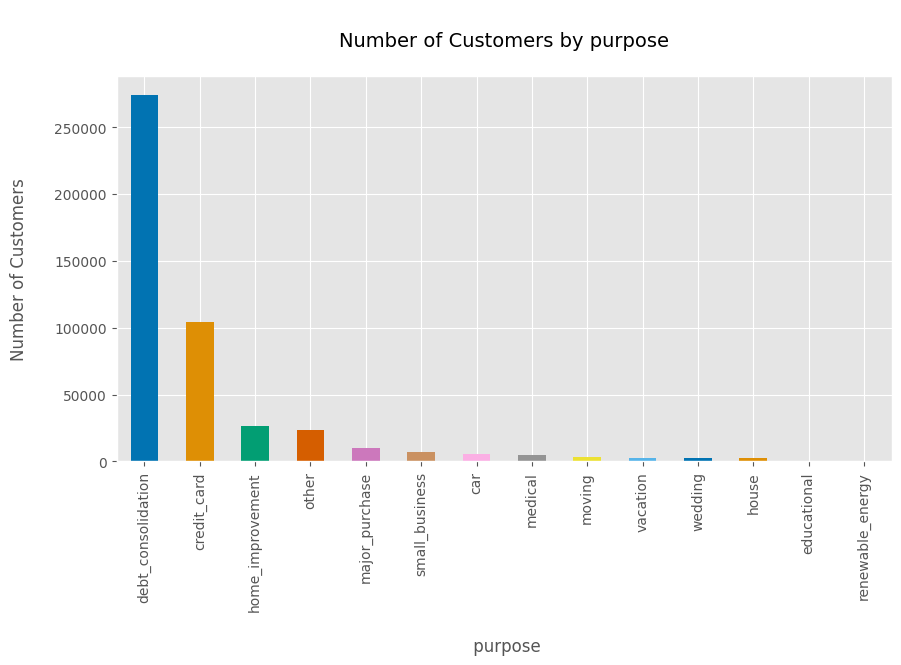

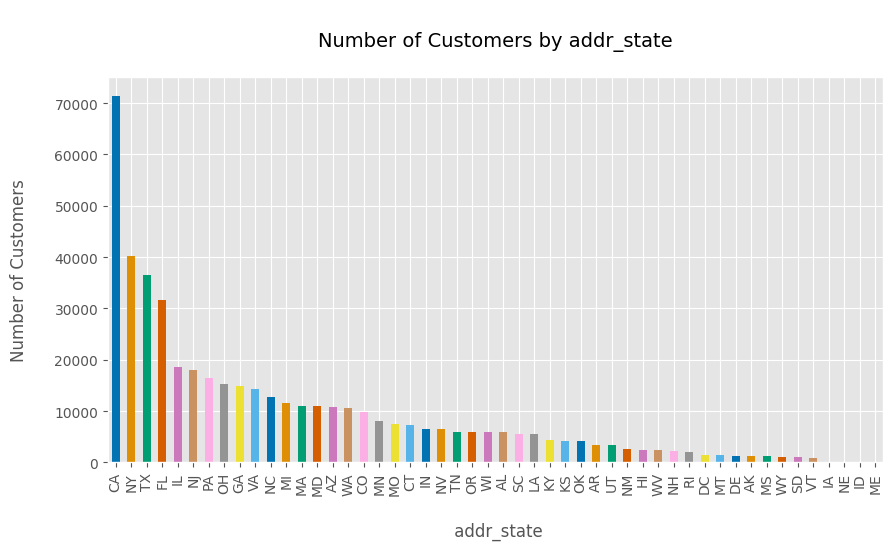

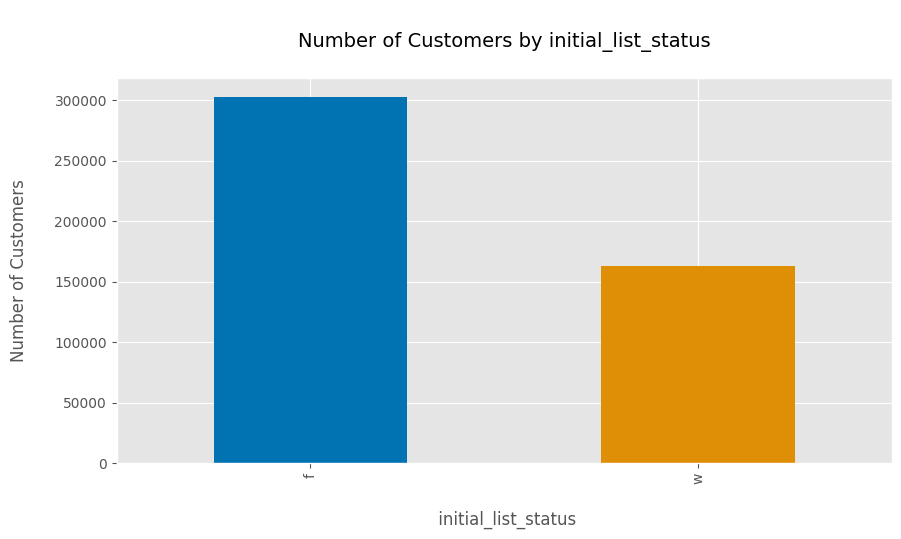

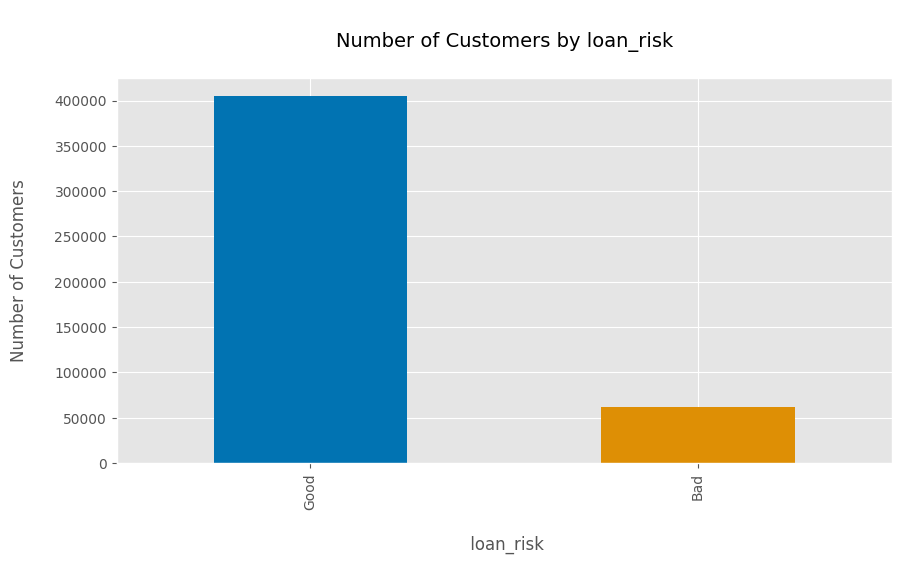

In [18]:
# Create bar charts for columns or categorical features
cat_var = ['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'initial_list_status','loan_risk']

plt.style.use("ggplot")
colors = sns.color_palette("colorblind")
for column in cat_var:
    plt.figure(figsize = (22,5))
    plt.subplot(121)
    df[column].value_counts().plot(kind = "bar", color = colors)
    plt.xlabel(f'\n {column}', fontsize = 12)
    plt.ylabel('Number of Customers\n', fontsize = 12)
    plt.title(f'\nNumber of Customers by {column}\n', fontsize = 14)

Some information :
- Term, more customers take out loans for 36 months compared to 60 months.
- Home_ownership, the majority have mortgage ownership status.
- Loan_status, most customers' loan status is current, followed by fully paid.
- Loan_risk, the majority of borrower customers are in the good category.

### Numerical Columns or Features

In [19]:
for col in num:
  print(f"Counts of {col} Column")
  print(df[col].value_counts(), '\n')

Counts of Unnamed: 0 Column
Unnamed: 0
0         1
310839    1
310865    1
310864    1
310863    1
         ..
155424    1
155423    1
155422    1
155421    1
466284    1
Name: count, Length: 466285, dtype: int64 

Counts of id Column
id
1077501     1
26180404    1
26219322    1
26239577    1
26290537    1
           ..
3714715     1
3703738     1
3731030     1
3705772     1
9199665     1
Name: count, Length: 466285, dtype: int64 

Counts of member_id Column
member_id
1296599     1
28653081    1
28692177    1
28702376    1
28763241    1
           ..
4686866     1
4847180     1
4724047     1
4678105     1
11061576    1
Name: count, Length: 466285, dtype: int64 

Counts of loan_amnt Column
loan_amnt
10000    33023
12000    25519
15000    23486
20000    22759
35000    16596
         ...  
34250        1
33400        1
32150        1
34325        1
33175        1
Name: count, Length: 1352, dtype: int64 

Counts of funded_amnt Column
funded_amnt
10000    32930
12000    25426
15000    23370

In [20]:
num_var = ['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'issue_d',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

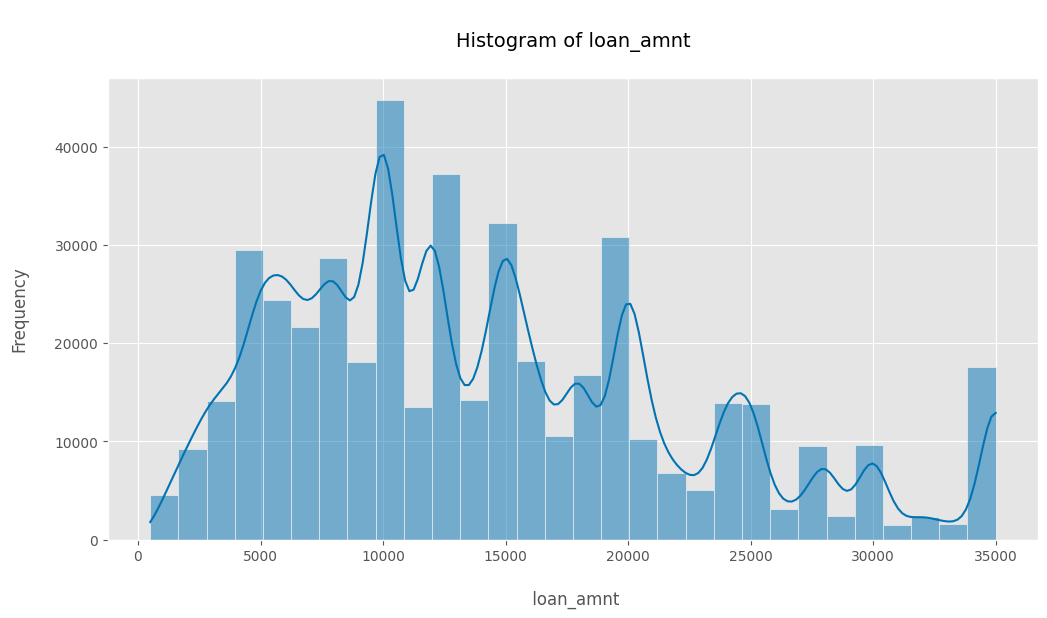

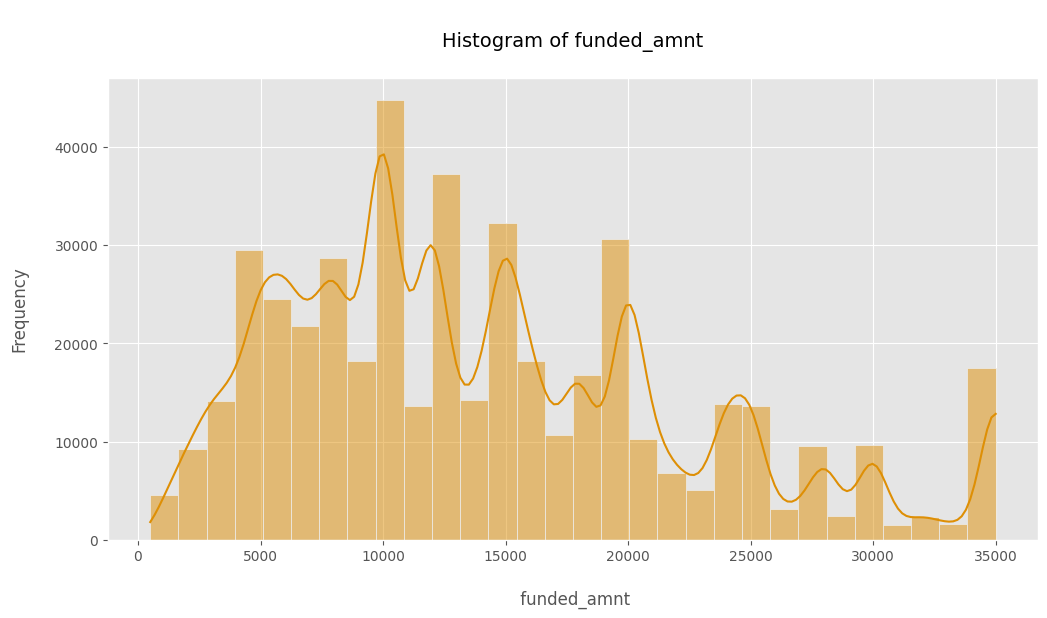

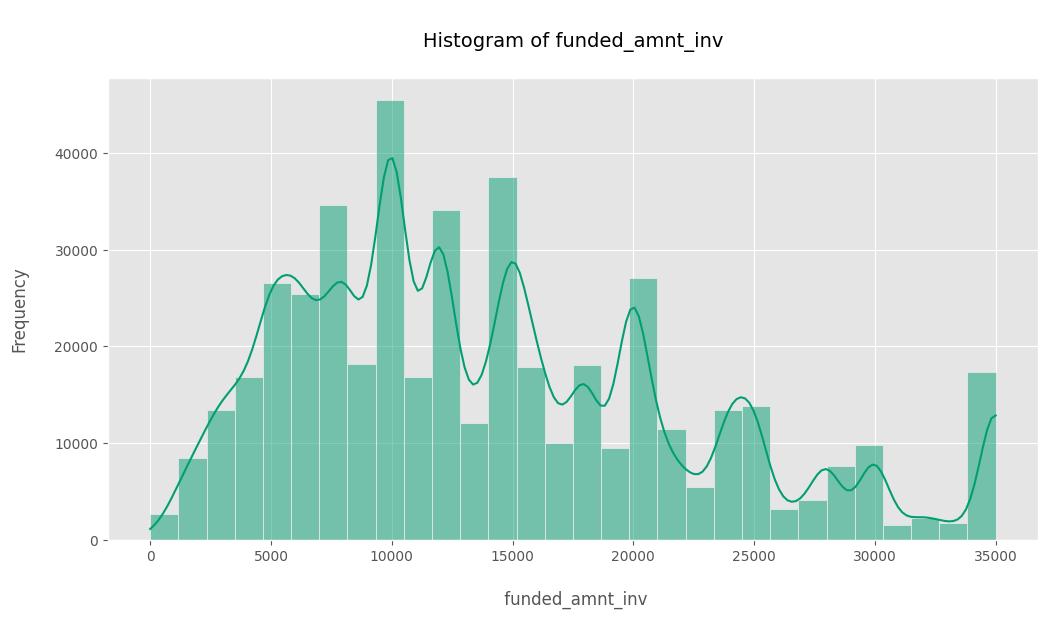

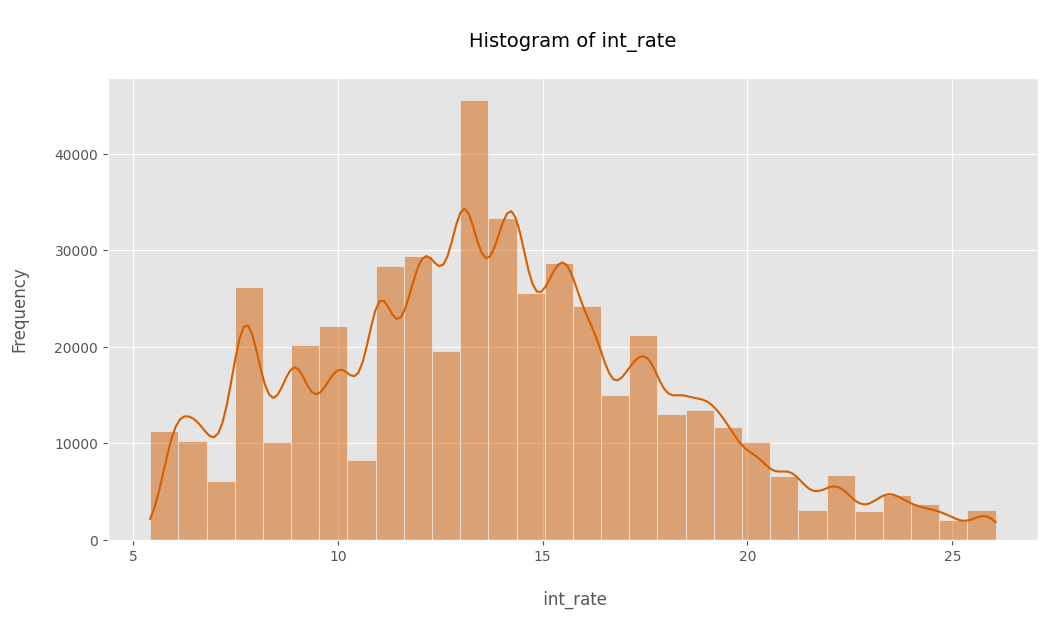

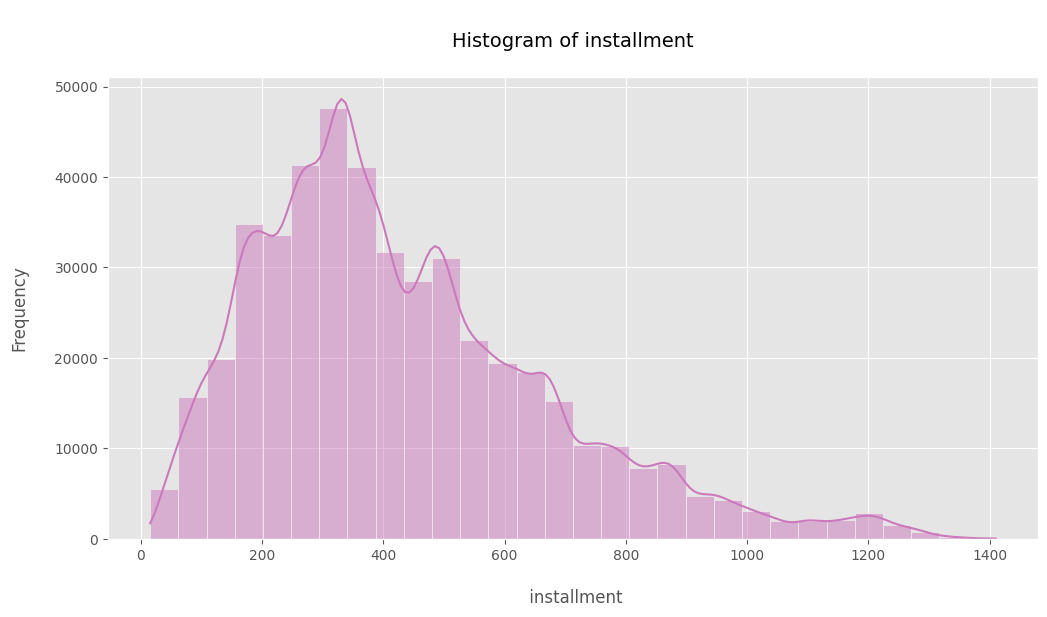

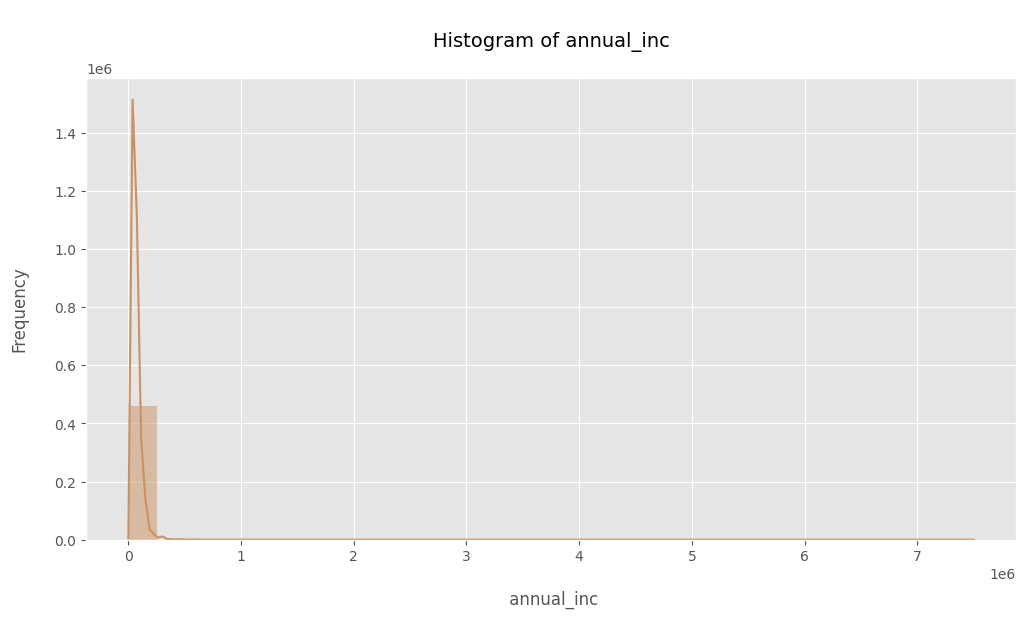

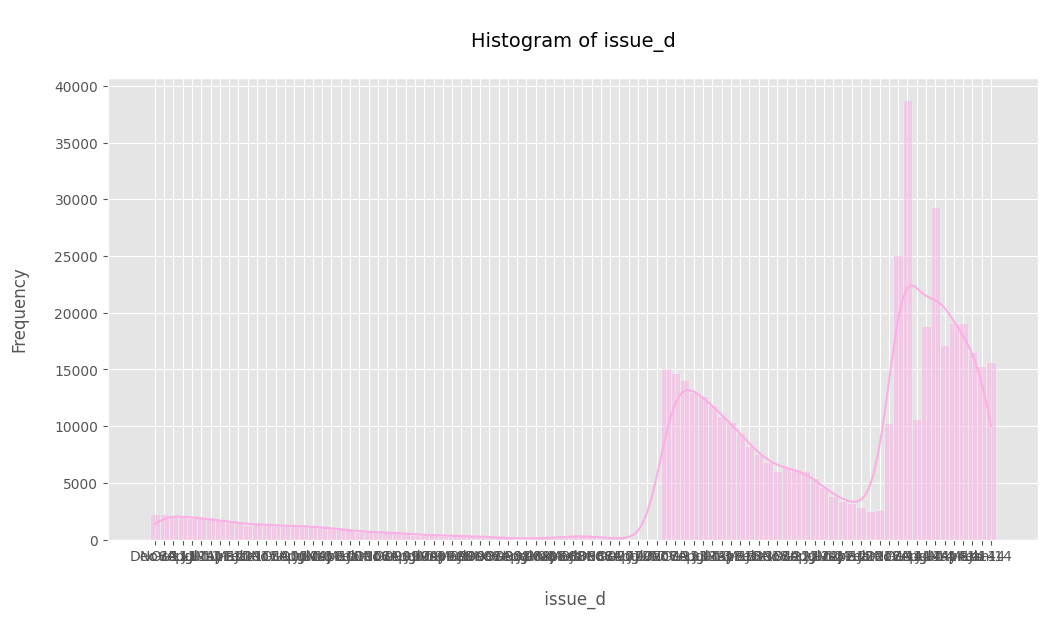

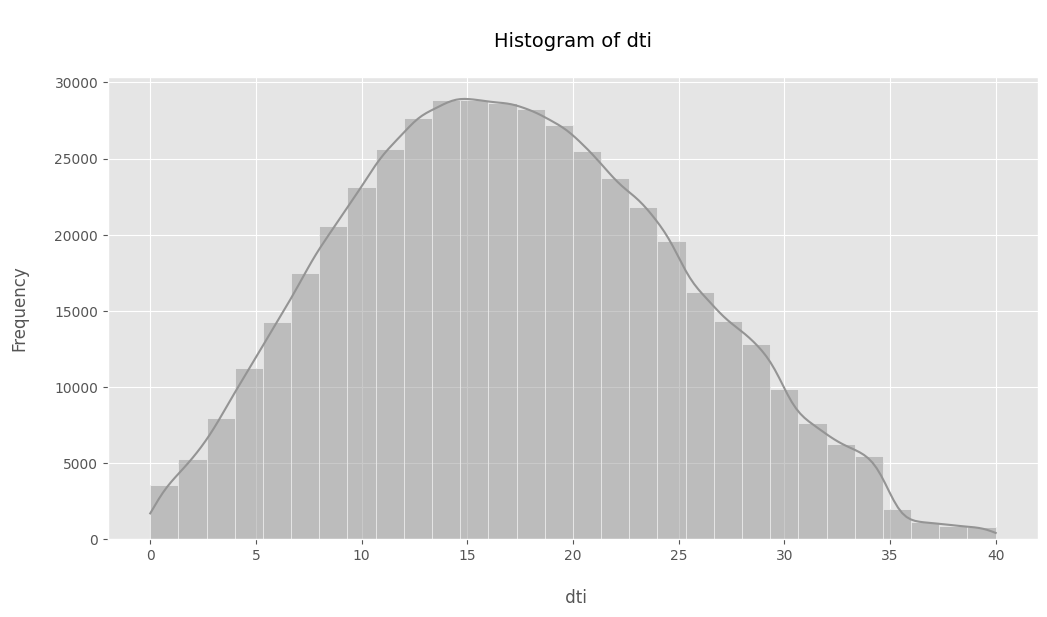

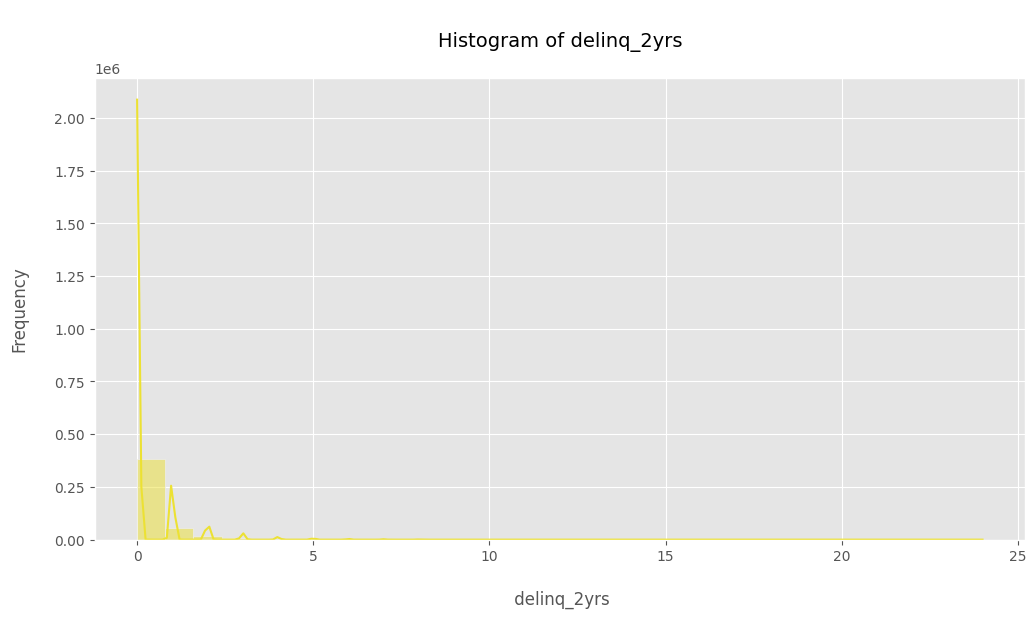

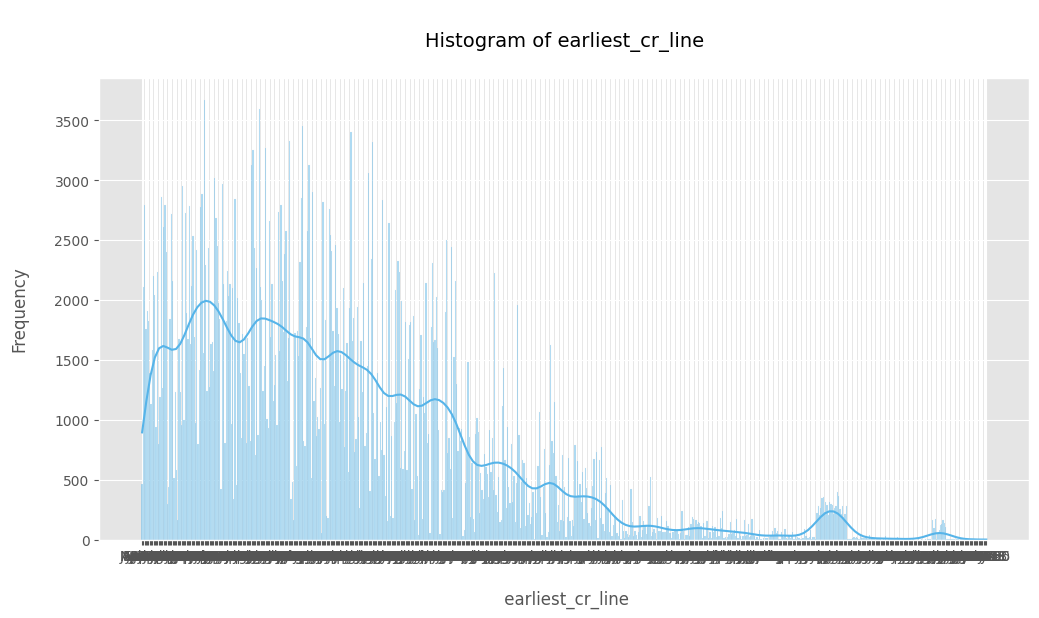

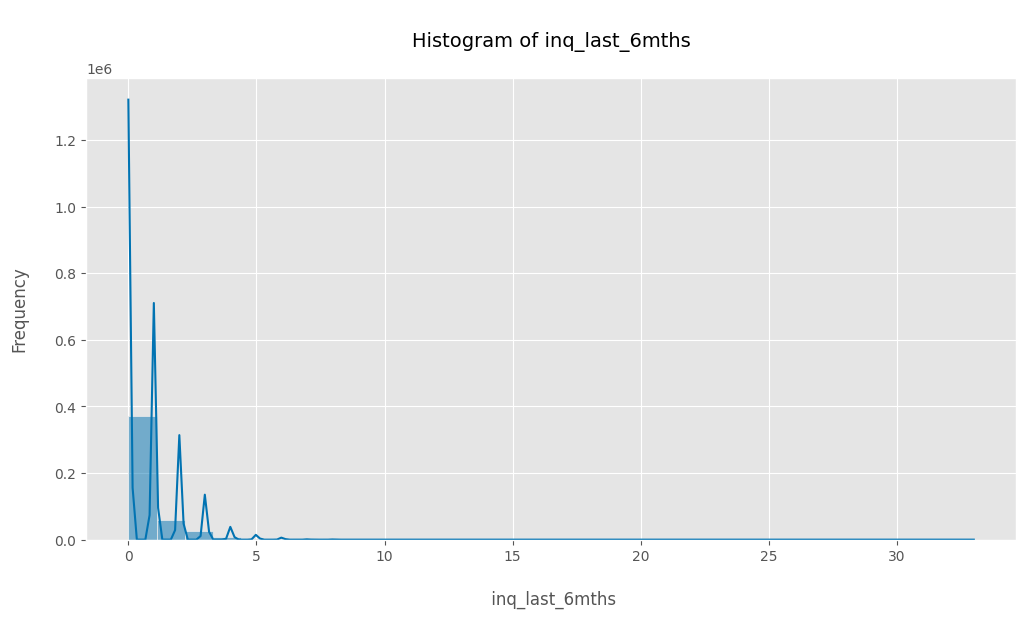

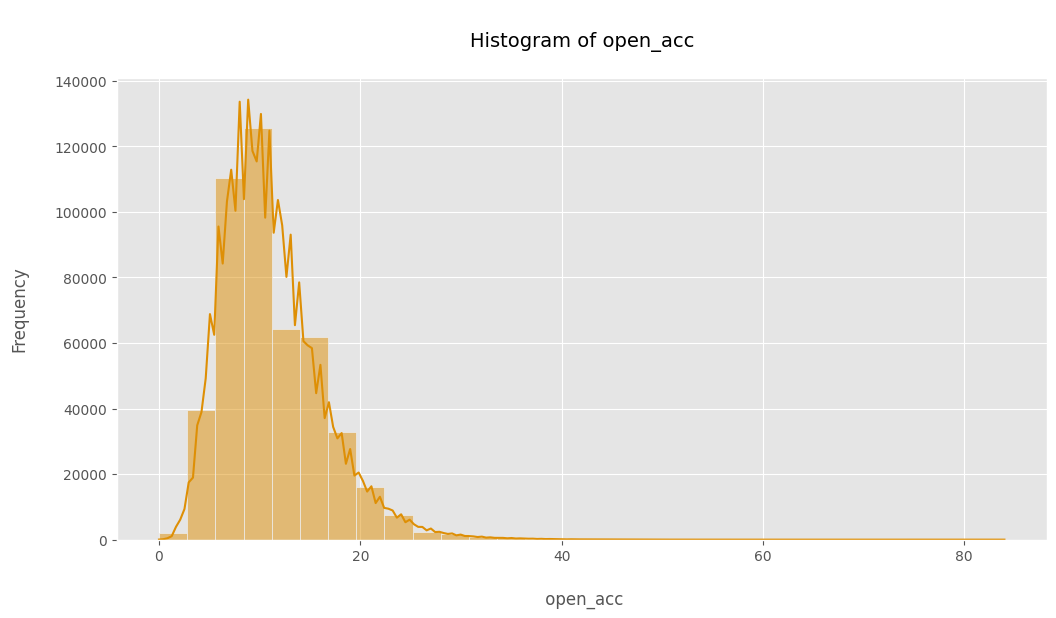

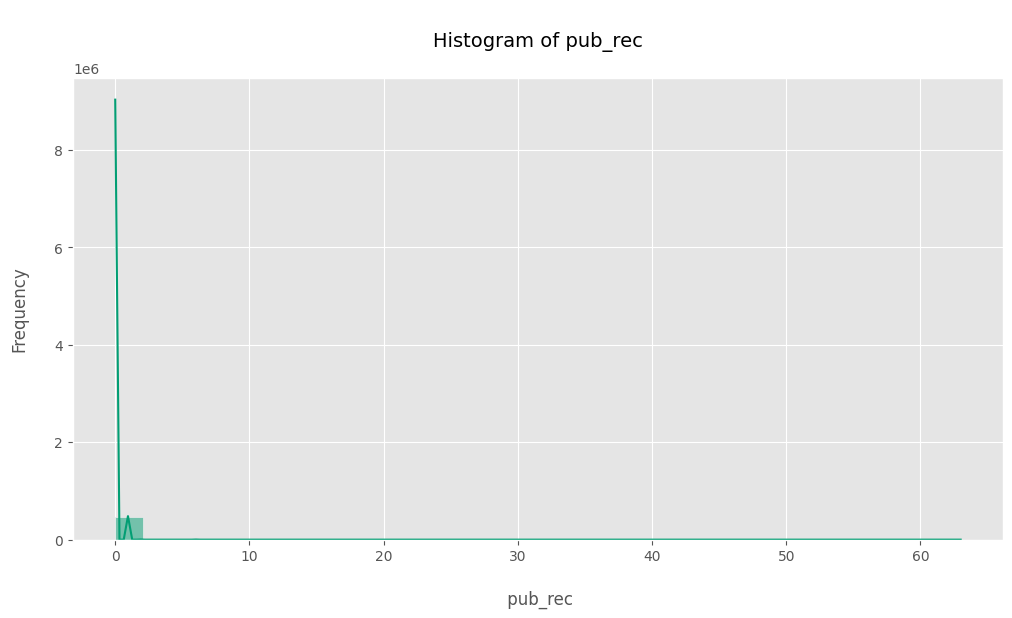

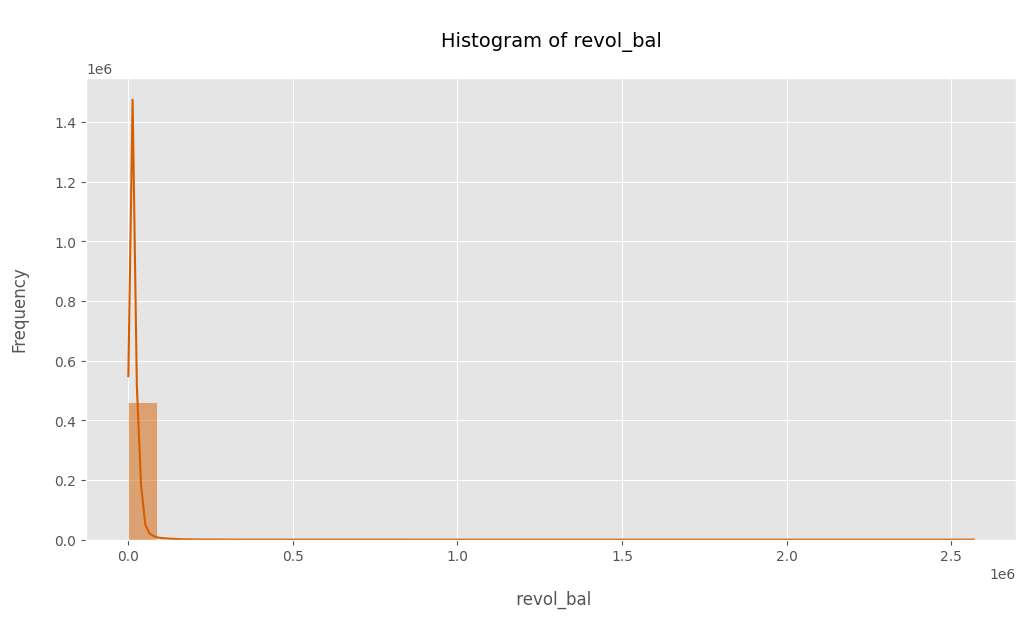

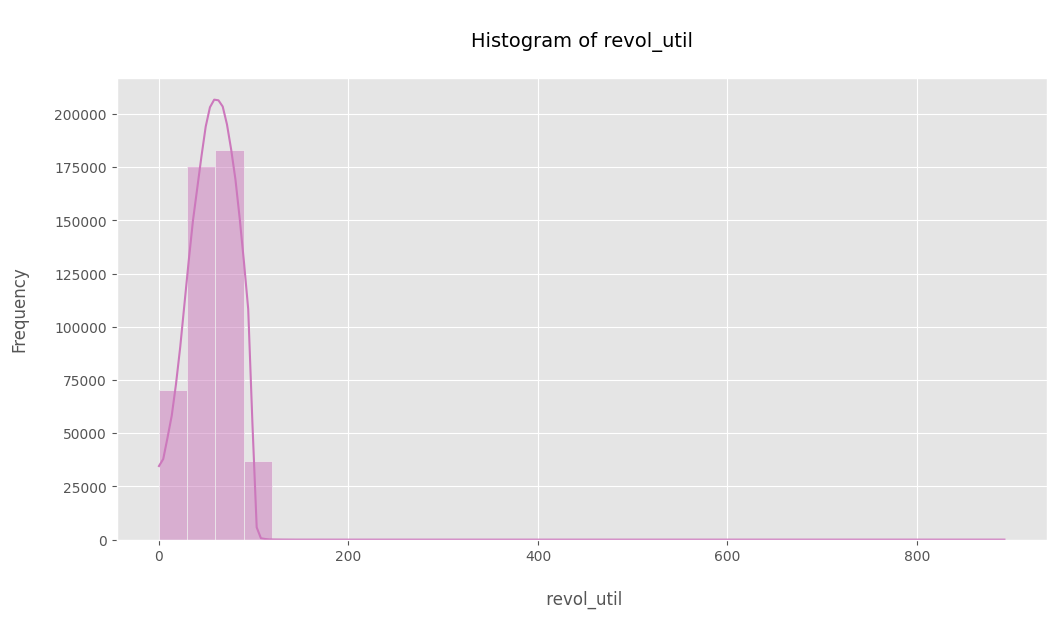

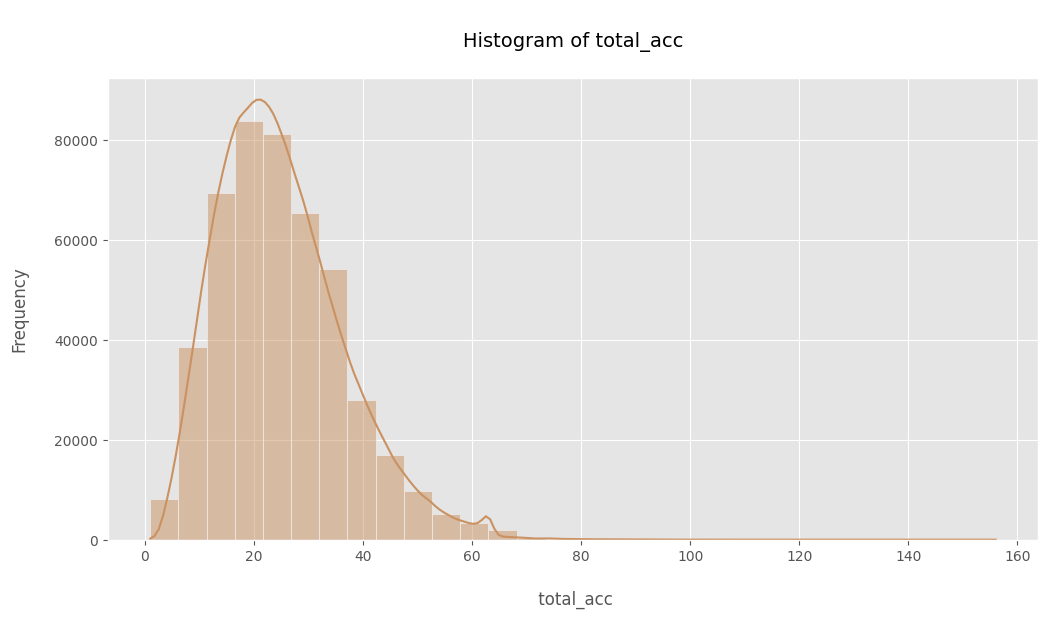

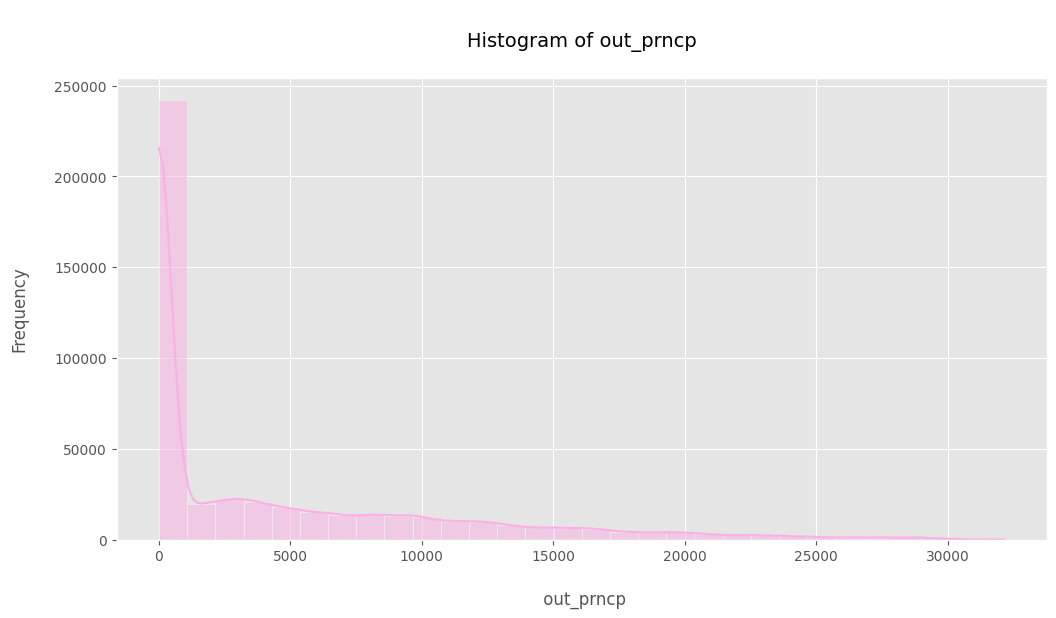

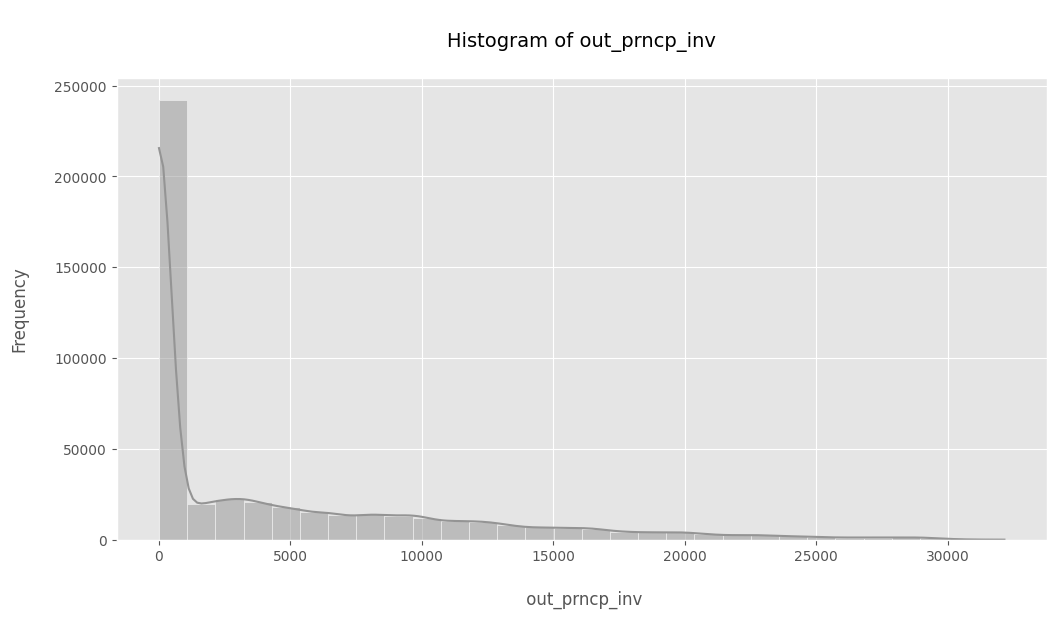

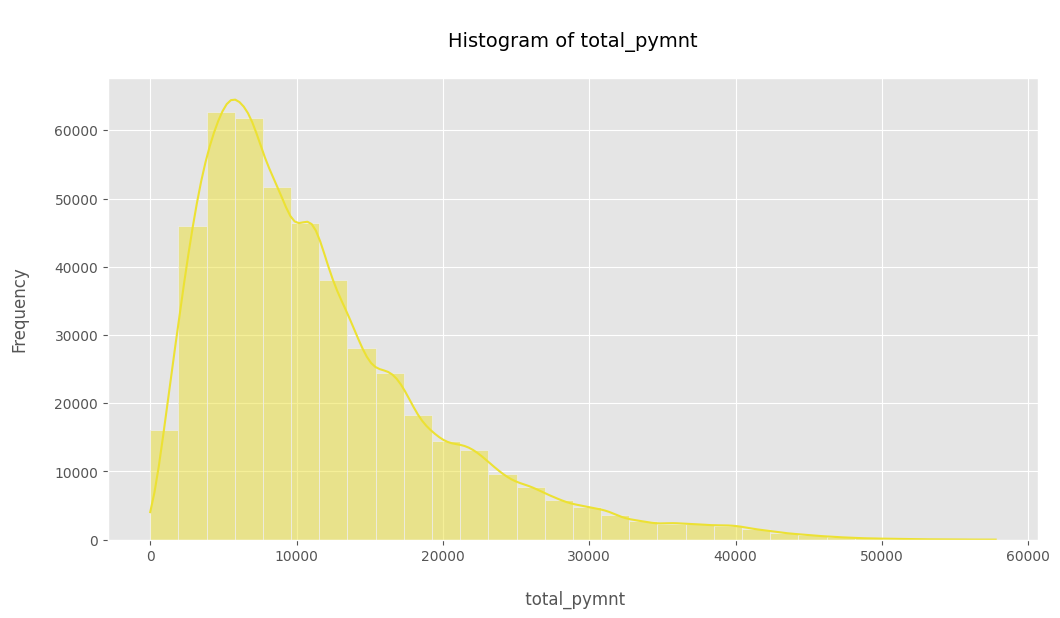

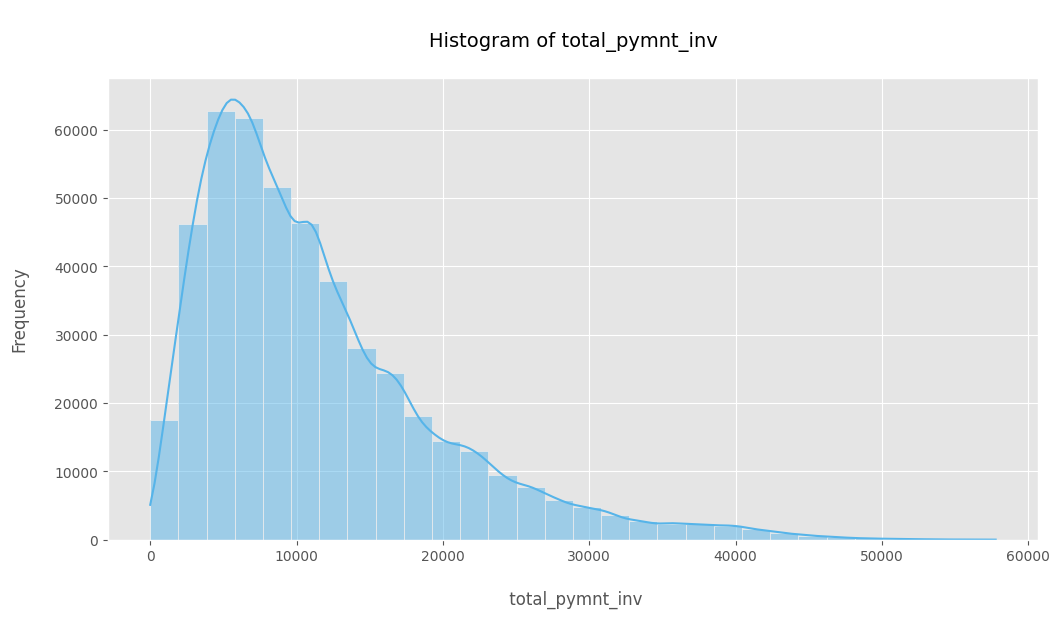

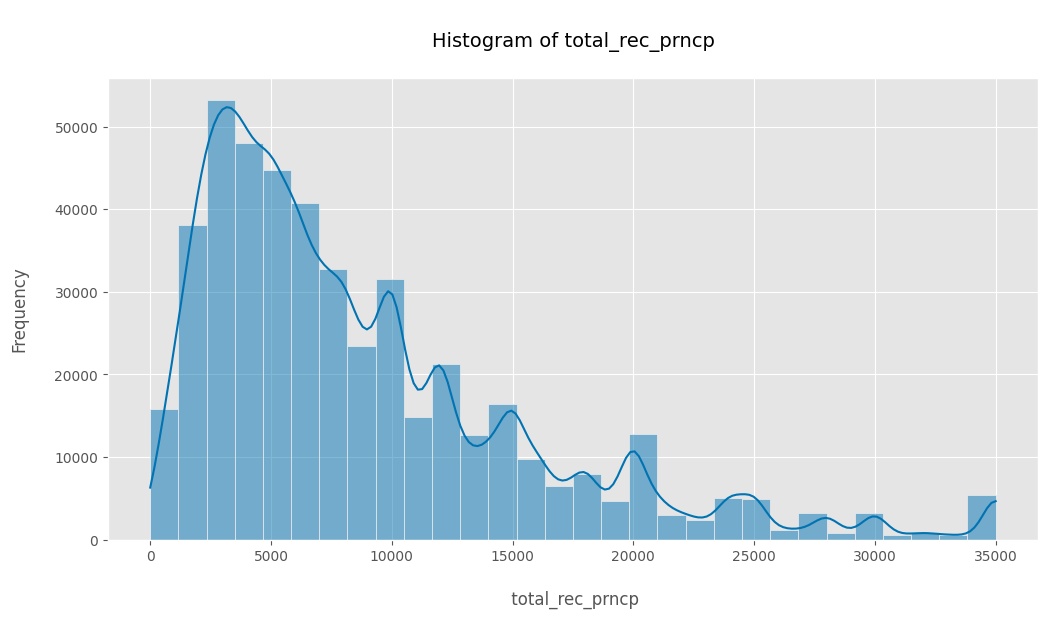

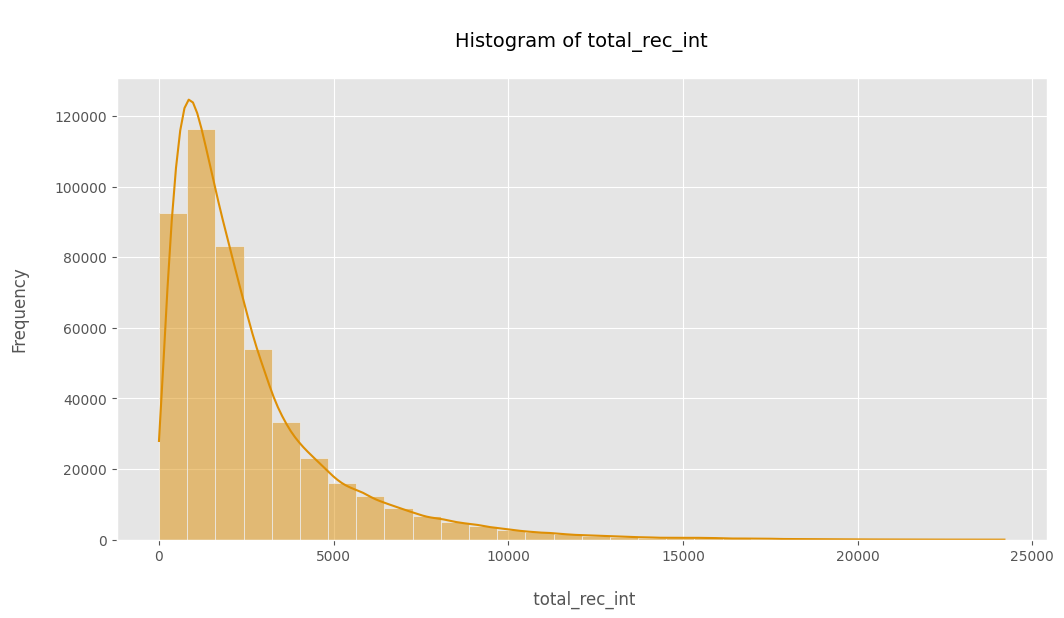

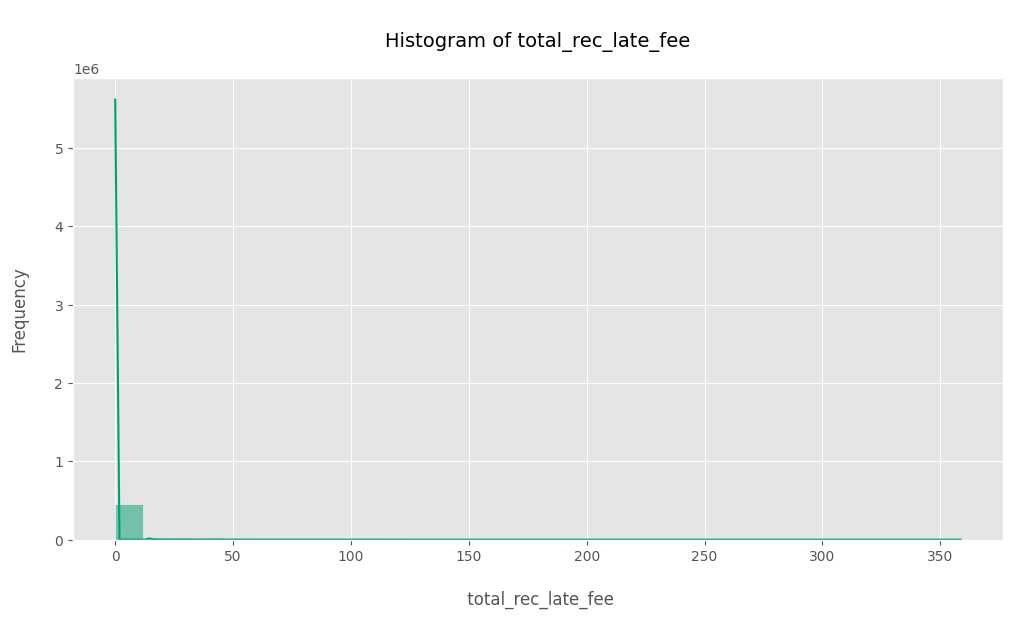

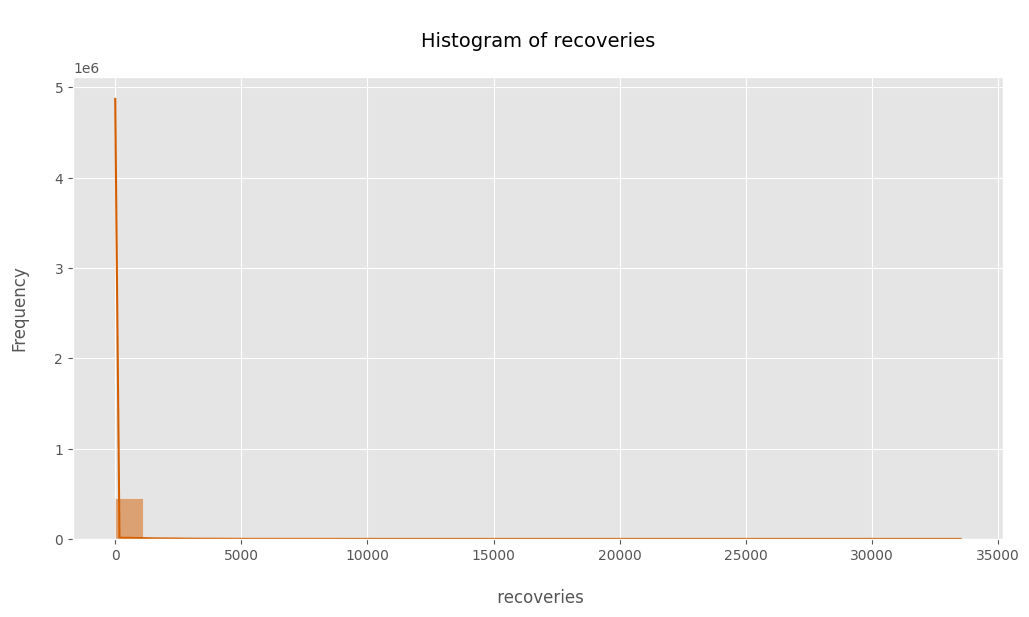

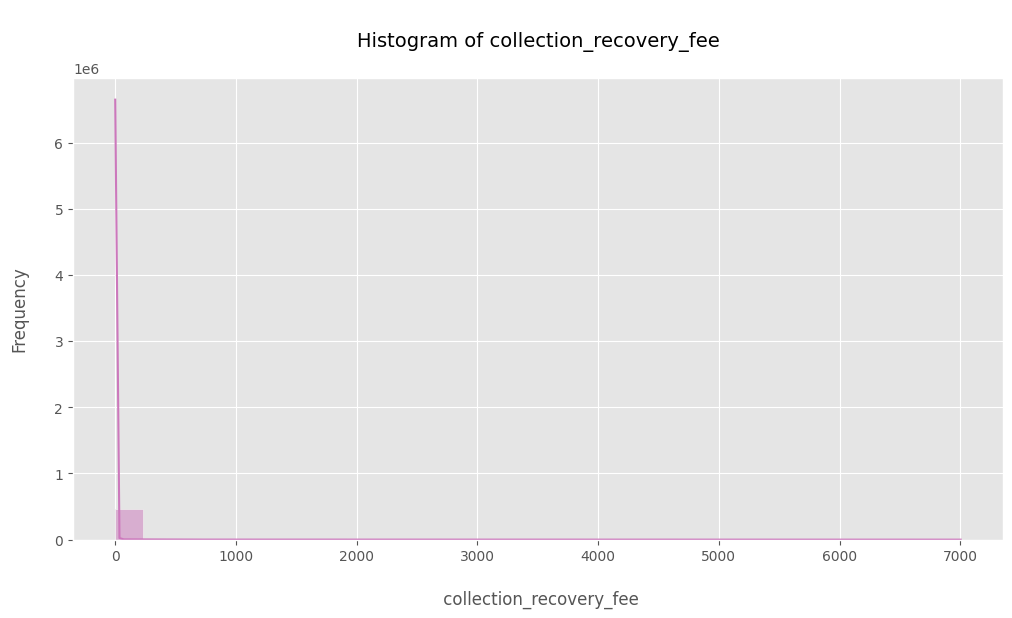

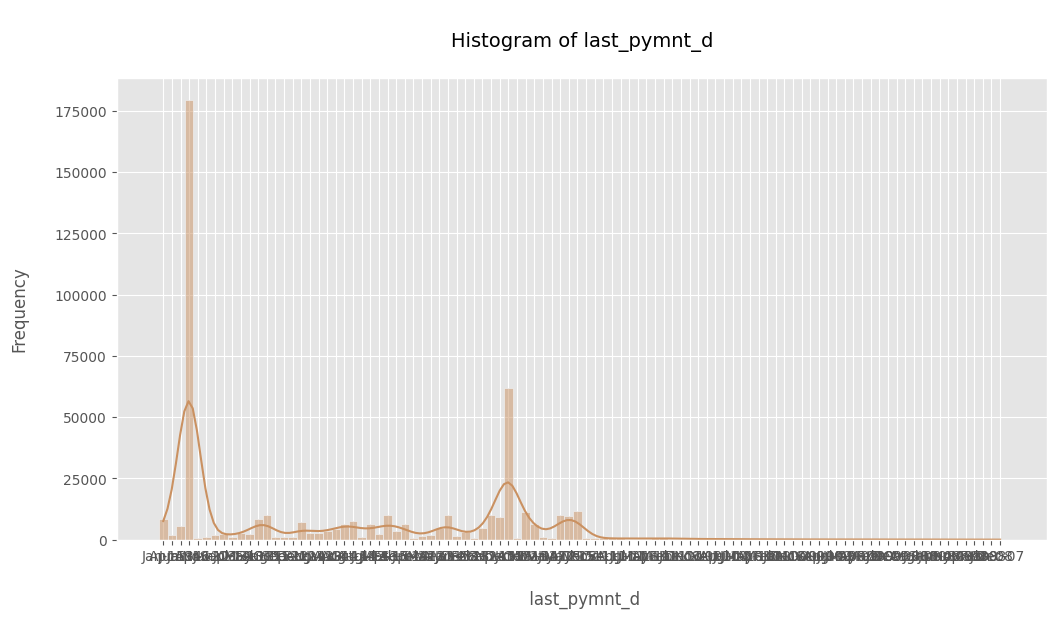

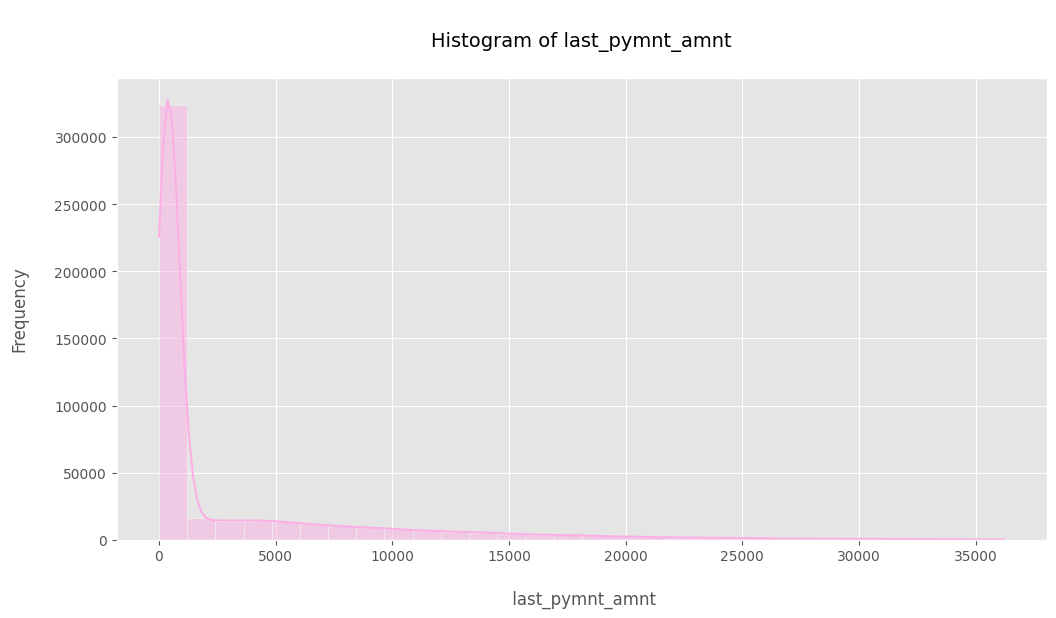

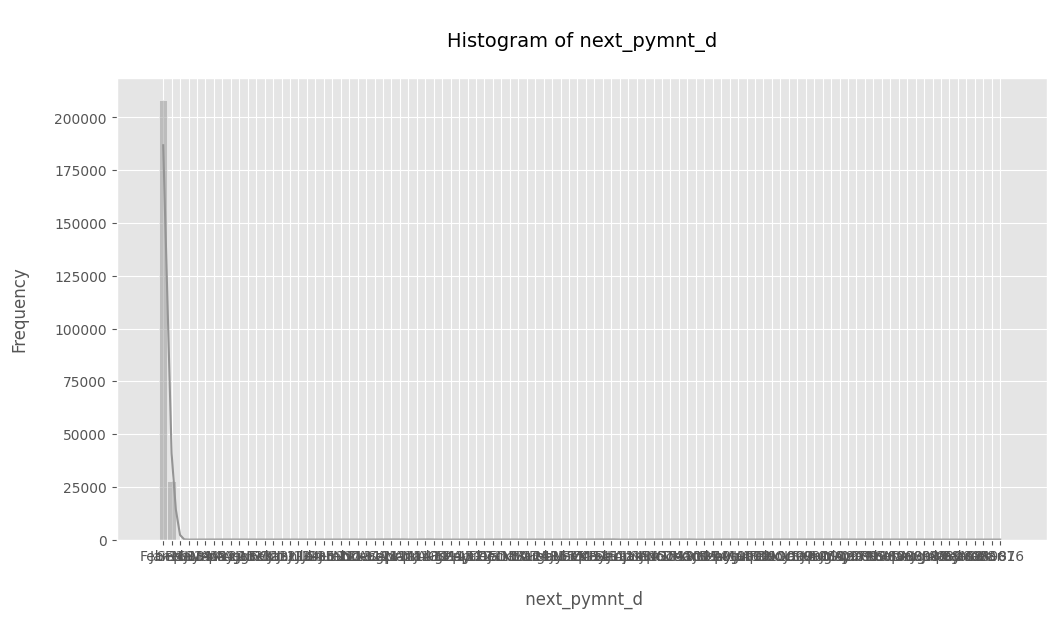

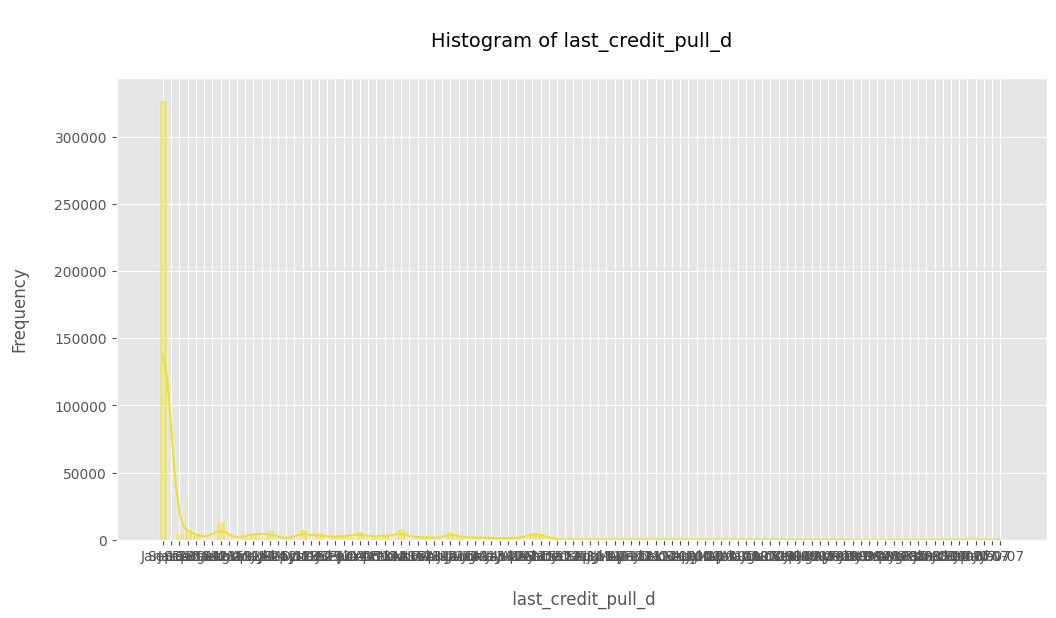

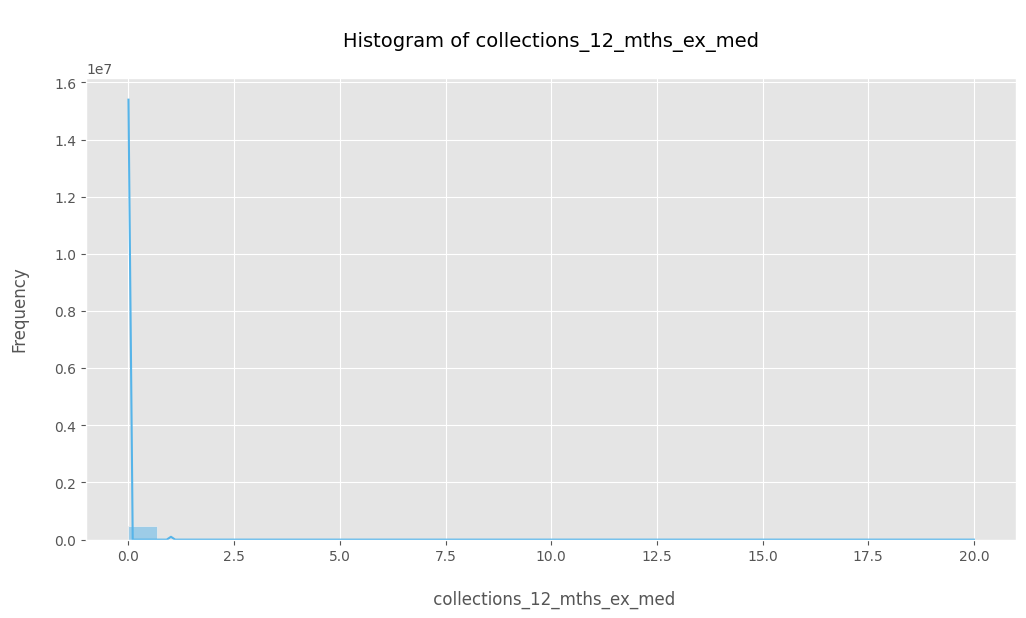

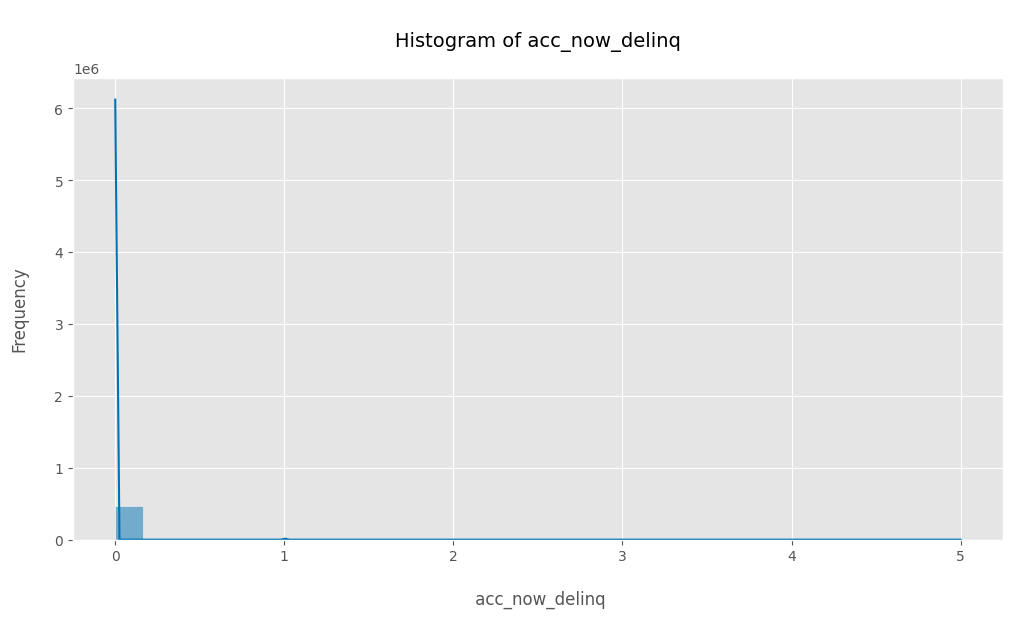

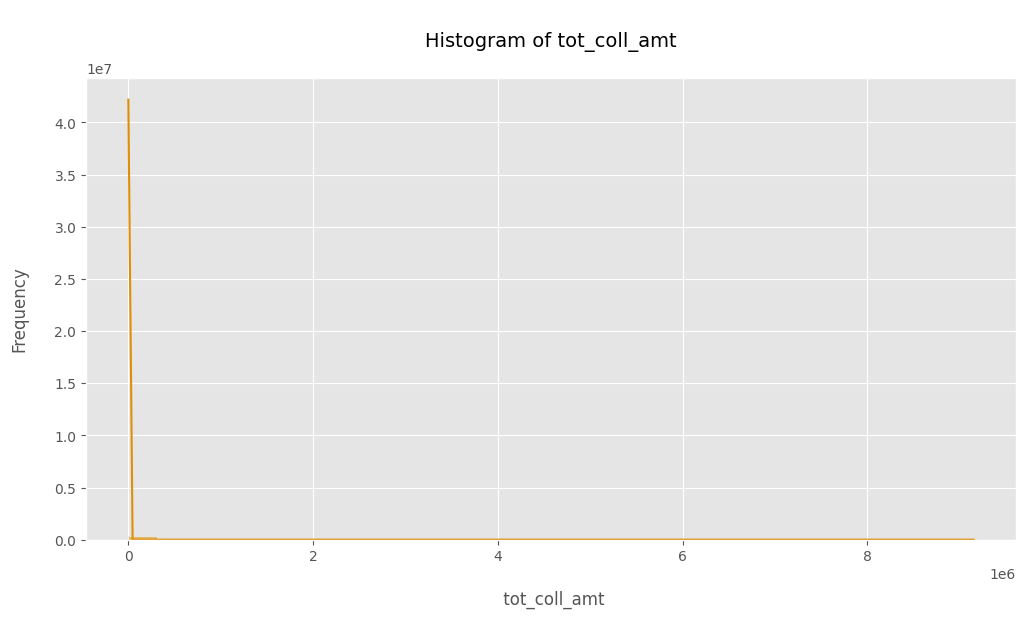

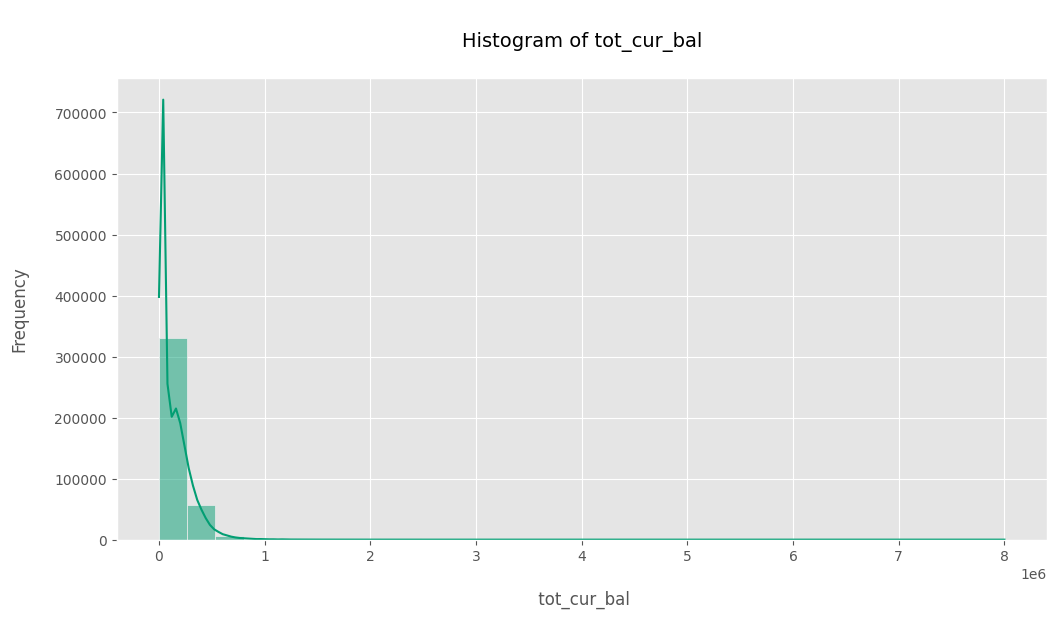

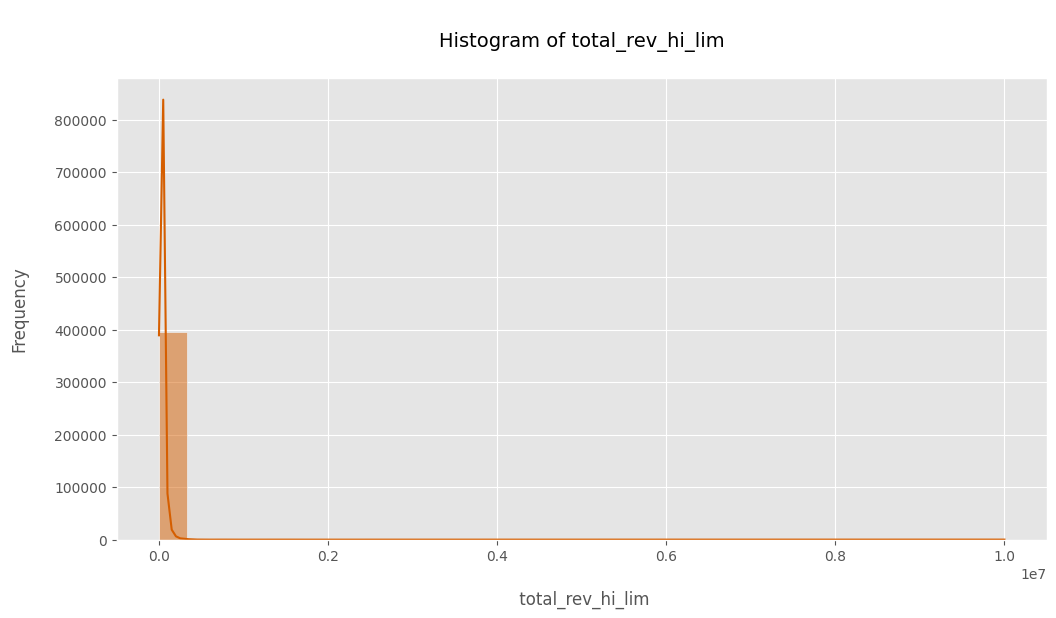

In [21]:
# Create histogram for columns or numeric features
plt.style.use("ggplot")
colors = sns.color_palette("colorblind")

for i, column in enumerate(num_var):
    plt.figure(figsize = (12, 6))
    sns.histplot(df[column], bins = 30, kde = True, color = colors[i % len(colors)])
    plt.xlabel(f'\n {column}', fontsize = 12)
    plt.ylabel('Frequency\n', fontsize = 12)
    plt.title(f'\nHistogram of {column}\n', fontsize = 14)
    plt.show()

##Bivariate Analysis

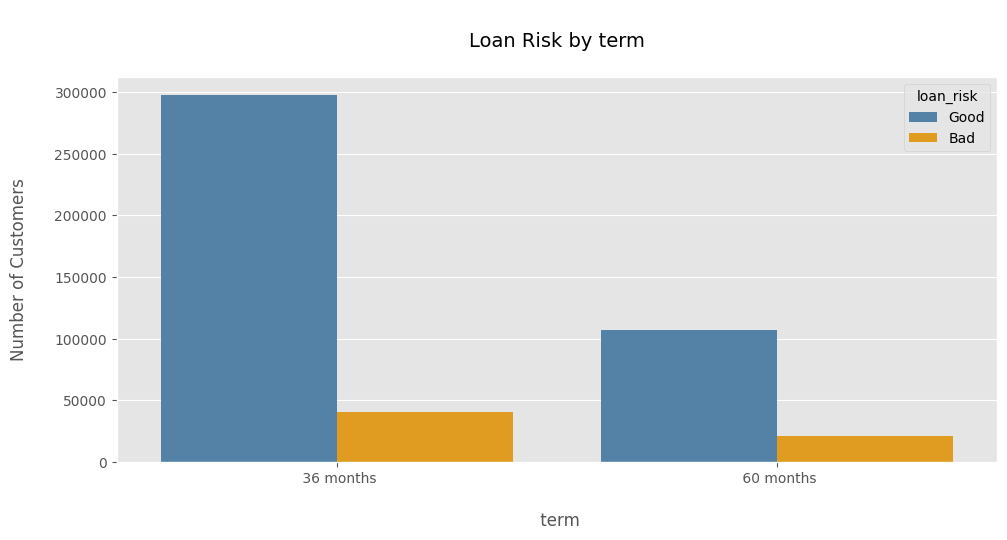

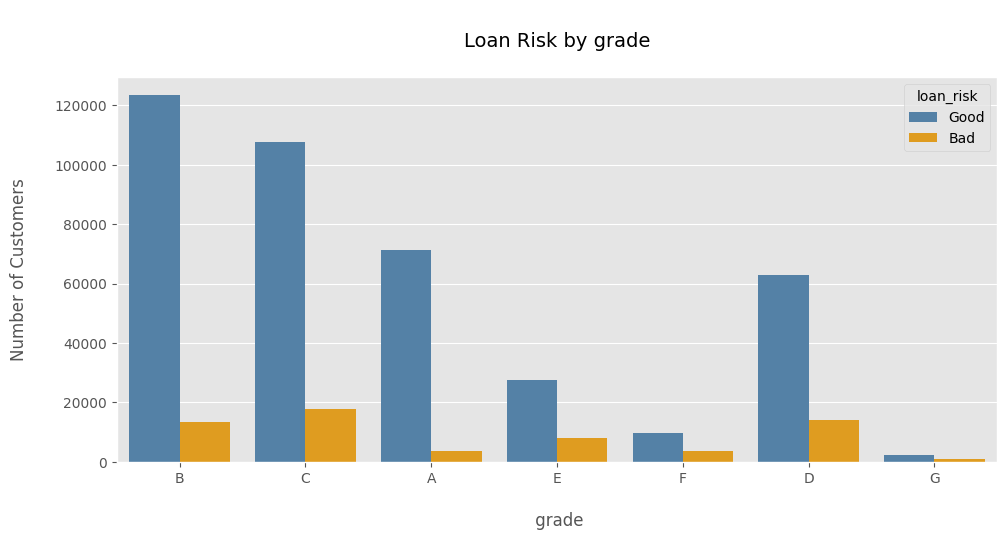

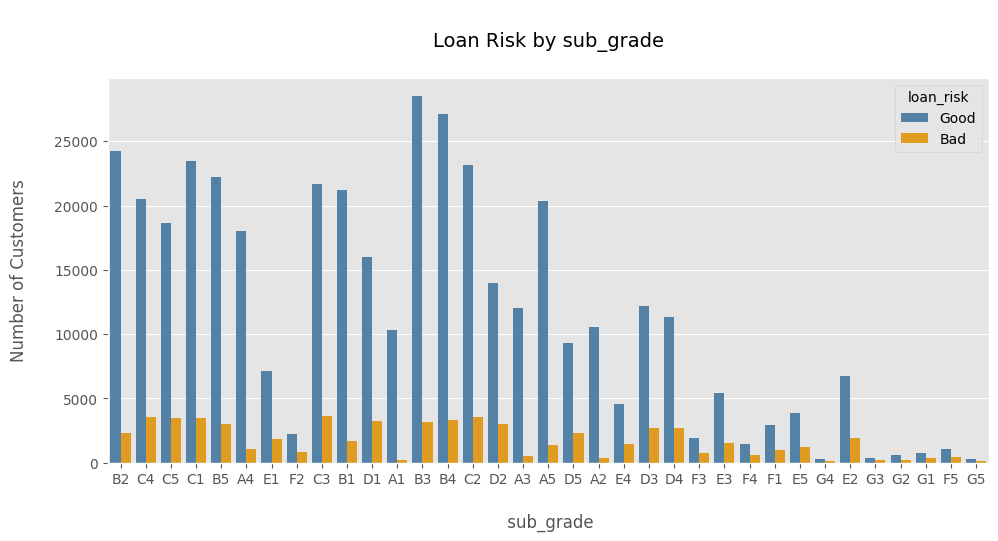

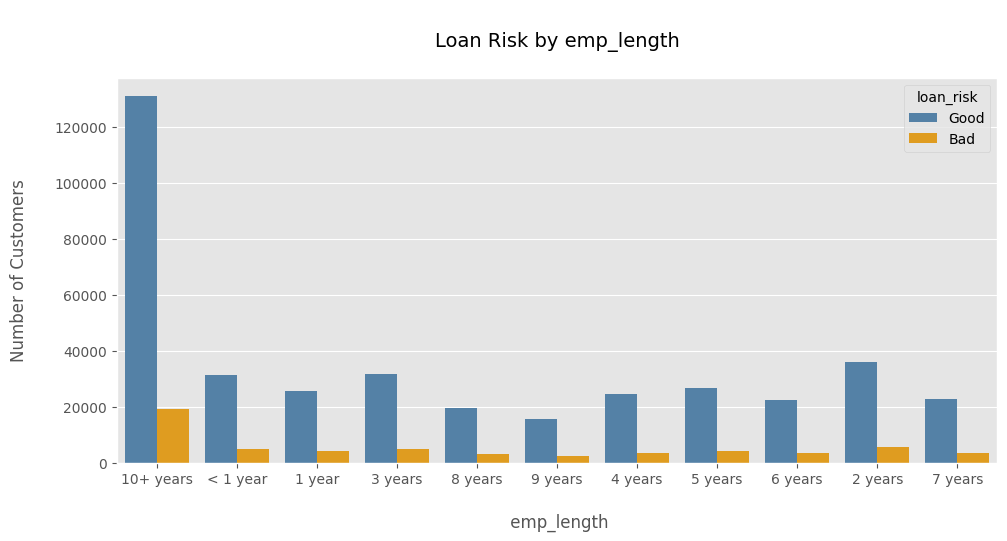

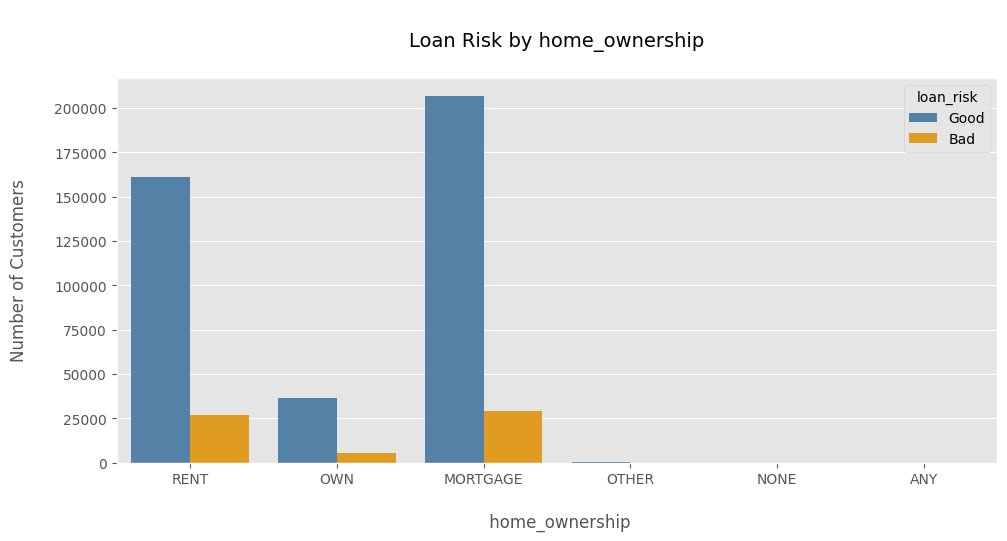

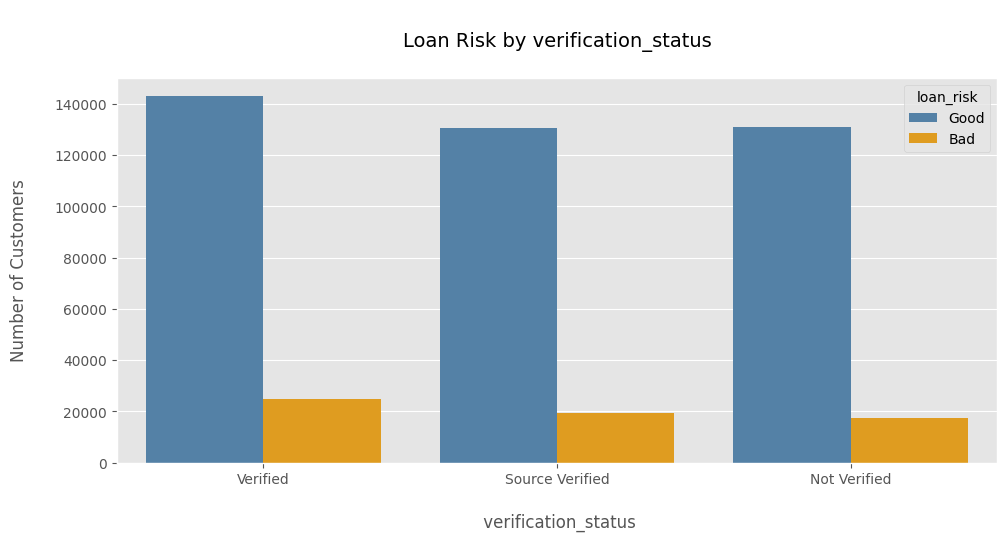

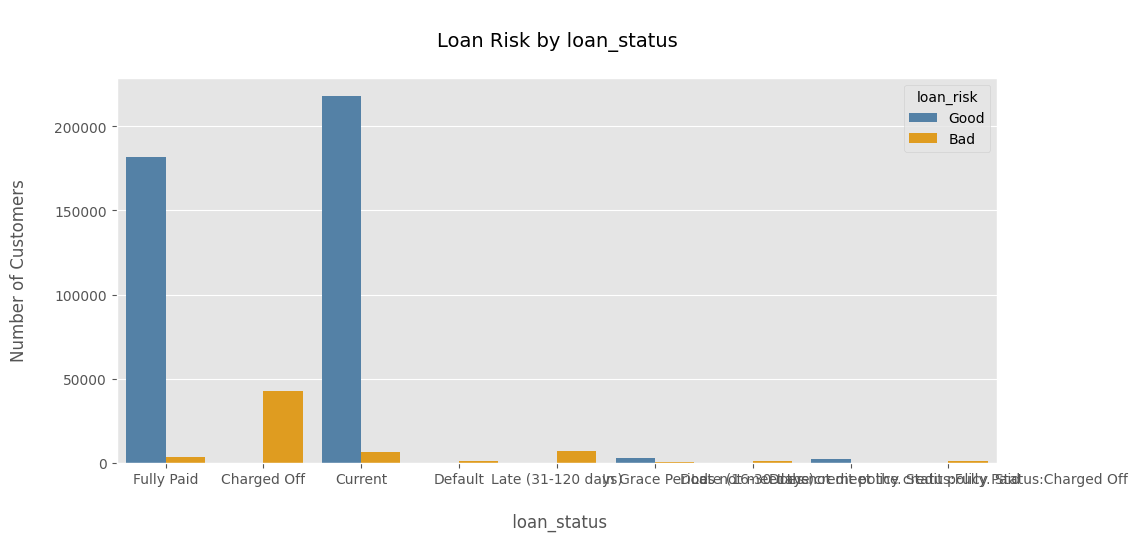

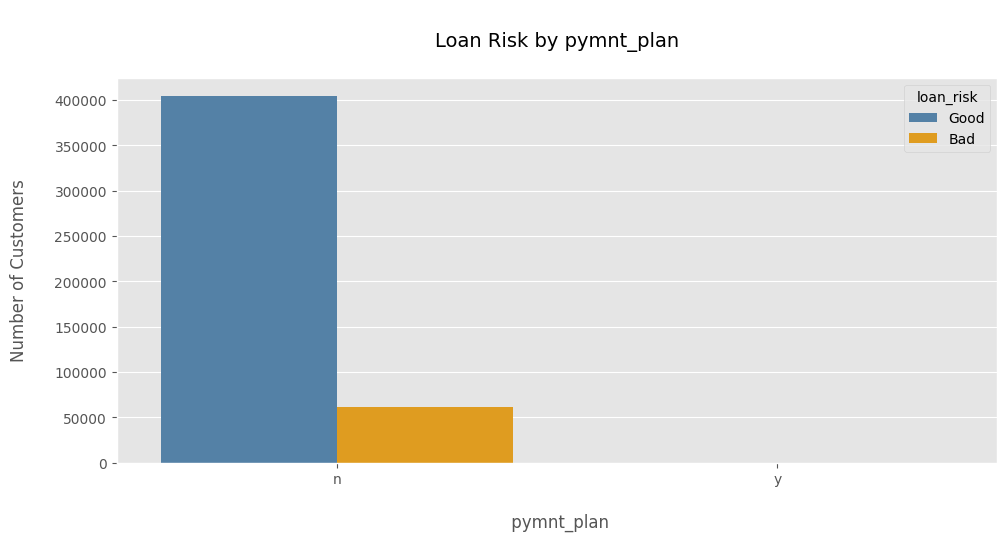

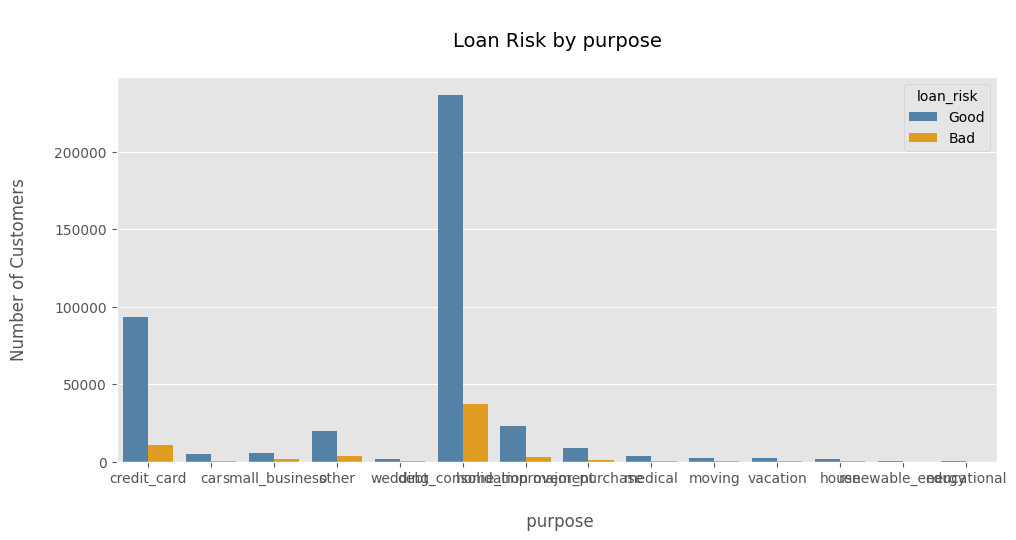

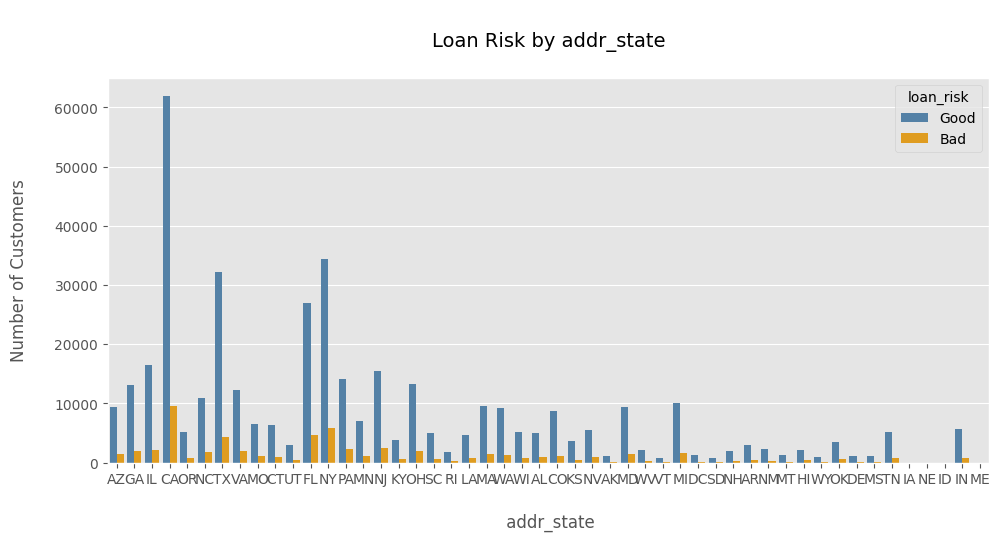

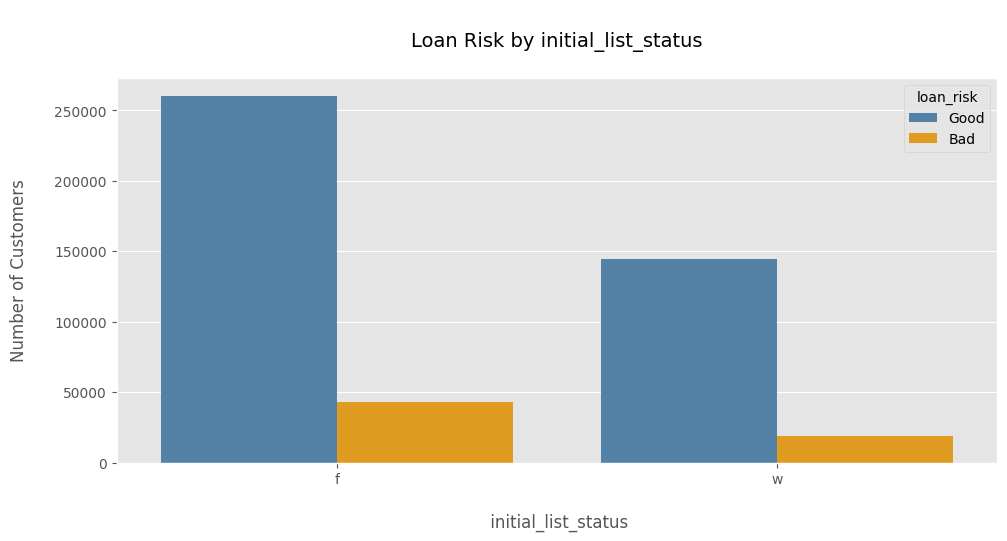

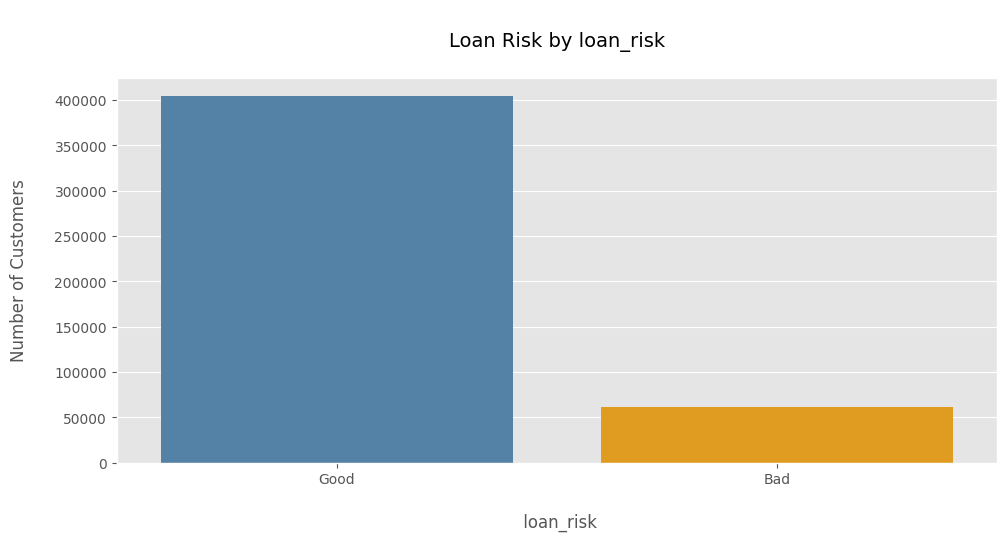

In [22]:
# Create bar charts for bivariate analysis
plt.style.use("ggplot")
colors = ['steelblue', 'orange']

for column in cat_var:
    plt.figure(figsize = (25, 5))
    plt.subplot(121)
    sns.countplot(x = df[column], hue = df["loan_risk"], palette = colors)
    plt.xlabel(f'\n {column}', fontsize = 12)
    plt.ylabel('Number of Customers\n', fontsize = 12)
    plt.title(f'\nLoan Risk by {column}\n', fontsize = 14)
    plt.show()

# **Data Preparation**

## Handling Missing Value

In [23]:
df.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
loan_risk                0
Length: 76, dtype: int64

In [24]:
# Checking columns that have missing values (%)
data_null = df.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(df)) * 100, 2)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop = True)
data_null = data_null[data_null['percentage'] > 0]
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
data_null

feature  missing_value  percentage
0            mths_since_rcnt_il         466285      100.00
1                   open_rv_12m         466285      100.00
2                   open_il_24m         466285      100.00
3                   open_acc_6m         466285      100.00
4                  total_bal_il         466285      100.00
5     verification_status_joint         466285      100.00
6                     dti_joint         466285      100.00
7                       il_util         466285      100.00
8                   open_rv_24m         466285      100.00
9                    open_il_6m         466285      100.00
10                   max_bal_bc         466285      100.00
11                     all_util         466285      100.00
12             annual_inc_joint         466285      100.00
13                       inq_fi         466285      100.00
14                  total_cu_tl         466285      100.00
15                 inq_last_12m         466285      100.00
16                  open_il_12m         466285      100.00
17       mths_since_last_record         403647       86.57
18  mths_since_last_major_derog         367311       78.77
19                         desc         340304       72.98
20       mths_since_last_delinq         250351       53.69
21                 next_pymnt_d         227214       48.73
22                 tot_coll_amt          70276       15.07
23             total_rev_hi_lim          70276       15.07
24                  tot_cur_bal          70276       15.07
25                    emp_title          27588        5.92
26                   emp_length          21008        4.51
27                 last_pymnt_d            376        0.08
28                   revol_util            340        0.07
29   collections_12_mths_ex_med            145        0.03
30               inq_last_6mths             29        0.01
31                     open_acc             29        0.01
32                      pub_rec             29        0.01
33             earliest_cr_line             29        0.01
34                    total_acc             29        0.01
35                  delinq_2yrs             29        0.01
36           last_credit_pull_d             42        0.01
37               acc_now_delinq             29        0.01

In [25]:
# Delete columns or features that have null values
unnecessary = ['inq_last_12m', 'total_bal_il', 'annual_inc_joint',
                         'dti_joint', 'verification_status_joint',	'open_acc_6m',
                         'open_il_12m',	'open_il_24m',	'mths_since_rcnt_il',
                         'open_il_6m', 'il_util',	'total_cu_tl',
                         'open_rv_12m',	'open_rv_24m',	'max_bal_bc',
                         'all_util', 'inq_fi', 'mths_since_last_record',
                         'mths_since_last_major_derog',	'desc', 'mths_since_last_delinq']
df = df.drop(unnecessary, axis = 1)

In [26]:
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].median())
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(df['tot_coll_amt'].median())
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(df['tot_cur_bal'].median())

In [27]:
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format = '%b-%y')
df['next_pymnt_d'] = df['next_pymnt_d'].fillna(df['next_pymnt_d'].median())

In [28]:
df.dropna(inplace = True)

In [29]:
df.isnull().sum()

Unnamed: 0                    0
id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_ut

## Feature Engineering

In [30]:
df.sample(10)

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
81792        81792   7345323    9007452      20000        20000   
310154      310154  26479524   28962535       9000         9000   
128870      128870   5647322    7029601       9750         9750   
462281      462281  10072750   11924041      12000        12000   
225340      225340   1156822    1397185       3600         3600   
92207        92207   7081844    5026159      21000        21000   
21293        21293    646105     826672      15000        15000   
325675      325675  24094369   26487330      15500        15500   
203093      203093   1471454    1728382      10000        10000   
29732        29732    519704     671835      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade  ...  \
81792      20000.000000   36 months     10.99       654.68     B  ...   
310154      9000.000000   36 months      7.69       280.75     A  ...   
128870      9750.000000   36 months     15.80       341.82     C  ...   
462281     12000.000000   36 months      6.62       368.45     A  ...   
225340      3600.000000   36 months     15.31       125.35     C  ...   
92207      20950.000000   36 months     11.55       693.00     B  ...   
21293      15000.000000   36 months     13.72       510.63     C  ...   
325675     15500.000000   60 months     16.99       385.14     D  ...   
203093     10000.000000   36 months     14.33       343.39     C  ...   
29732       9747.657484   36 months     11.36       329.10     B  ...   

       next_pymnt_d last_credit_pull_d collections_12_mths_ex_med policy_code  \
81792    2016-02-01             Jan-16                        0.0           1   
310154   2016-02-01             Jan-16                        0.0           1   
128870   2016-02-01             Jan-16                        0.0           1   
462281   2016-02-01             Jan-16                        0.0           1   
225340   2016-02-01             Jan-16                        0.0           1   
92207    2016-02-01             Nov-15                        0.0           1   
21293    2016-02-01             Jan-16                        0.0           1   
325675   2016-02-01             Jan-16                        0.0           1   
203093   2016-02-01             Sep-15                        0.0           1   
29732    2016-02-01             May-15                        0.0           1   

        application_type acc_now_delinq tot_coll_amt tot_cur_bal  \
81792         INDIVIDUAL            0.0          0.0    382314.0   
310154        INDIVIDUAL            0.0          0.0    256208.0   
128870        INDIVIDUAL            0.0          0.0     12323.0   
462281        INDIVIDUAL            0.0          0.0    385360.0   
225340        INDIVIDUAL            0.0          0.0     81539.0   
92207         INDIVIDUAL            0.0          0.0    136579.0   
21293         INDIVIDUAL            0.0          0.0     81539.0   
325675        INDIVIDUAL            0.0          0.0     39161.0   
203093        INDIVIDUAL            0.0          0.0     81539.0   
29732         INDIVIDUAL            0.0          0.0     81539.0   

       total_rev_hi_lim loan_risk  
81792           43700.0      Good  
310154          15500.0       Bad  
128870          13000.0      Good  
462281          20700.0      Good  
225340          22800.0       Bad  
92207           42600.0      Good  
21293           22800.0      Good  
325675          54700.0      Good  
203093          22800.0      Good  
29732           22800.0      Good  

[10 rows x 55 columns]

In [31]:
# Change the column or feature to the required datetime
date_columns = ['last_credit_pull_d', 'last_pymnt_d', 'earliest_cr_line', 'issue_d']
df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x, format = '%b-%y'))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437709 entries, 1 to 466283
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Unnamed: 0                  437709 non-null  int64         
 1   id                          437709 non-null  int64         
 2   member_id                   437709 non-null  int64         
 3   loan_amnt                   437709 non-null  int64         
 4   funded_amnt                 437709 non-null  int64         
 5   funded_amnt_inv             437709 non-null  float64       
 6   term                        437709 non-null  object        
 7   int_rate                    437709 non-null  float64       
 8   installment                 437709 non-null  float64       
 9   grade                       437709 non-null  object        
 10  sub_grade                   437709 non-null  object        
 11  emp_title                   437709 non-null 

In [33]:
base = df.copy()

In [34]:
# Removes columns that have only one unique value, identity columns, and columns that are highly correlated with the target.
unnecessary = ['application_type',
               'policy_code',
               'Unnamed: 0','id',
               'member_id', 'zip_code',
               'url', 'loan_status', 'delinq_2yrs']
df = df.drop(unnecessary, axis=1)

##Label Encoding

In [35]:
cat_var = ['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'purpose',
 'title',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'loan_risk']

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat_var:
   df[i] = le.fit_transform(df[i])
df.sample(5).T

15325       181239     429268    299440  \
loan_amnt                    12000.00   5375.0000   16000.00  12000.00   
funded_amnt                  12000.00   5375.0000   16000.00  12000.00   
funded_amnt_inv              11975.00   5375.0000   15950.00  12000.00   
term                             1.00      0.0000       1.00      0.00   
int_rate                        11.49     18.7500      15.31     12.99   
installment                    263.86    196.3500     383.25    404.27   
grade                            1.00      3.0000       2.00      2.00   
sub_grade                        8.00     17.0000      13.00     10.00   
emp_title                   105547.00  66717.0000   25830.00  25290.00   
emp_length                       5.00      1.0000       5.00      5.00   
home_ownership                   5.00      5.0000       5.00      1.00   
annual_inc                   40560.00  35000.0000  175000.00  49000.00   
verification_status              0.00      0.0000       1.00      1.00   
issue_d                         45.00     64.0000      79.00     86.00   
pymnt_plan                       0.00      0.0000       0.00      0.00   
purpose                          2.00      9.0000       2.00      2.00   
title                        14072.00  56487.0000   15791.00  15791.00   
addr_state                       0.00      4.0000      22.00      9.00   
dti                             13.93      5.1700       5.57     16.76   
earliest_cr_line               389.00    435.0000     249.00    376.00   
inq_last_6mths                   1.00      0.0000       0.00      2.00   
open_acc                         6.00      5.0000       7.00     10.00   
pub_rec                          0.00      0.0000       0.00      0.00   
revol_bal                     7700.00   5485.0000    7875.00   8715.00   
revol_util                      43.80     62.3000      51.10     49.00   
total_acc                       19.00     13.0000      14.00     23.00   
initial_list_status              0.00      1.0000       0.00      0.00   
out_prncp                        0.00      0.0000   11483.79      0.00   
out_prncp_inv                    0.00      0.0000   11447.91      0.00   
total_pymnt                  12115.14   3443.9000    8431.50  13432.42   
total_pymnt_inv              12089.90   3443.9000    8405.15  13432.42   
total_rec_prncp              12000.00   1882.9200    4516.21  12000.00   
total_rec_int                  115.14   1062.3300    3915.29   1432.42   
total_rec_late_fee               0.00      0.0000       0.00      0.00   
recoveries                       0.00    498.6500       0.00      0.00   
collection_recovery_fee          0.00      4.9865       0.00      0.00   
last_pymnt_d                    42.00     75.0000      97.00     95.00   
last_pymnt_amnt              12117.05    196.3500     383.25    172.29   
next_pymnt_d                    97.00     97.0000      97.00     97.00   
last_credit_pull_d              44.00     82.0000      99.00     99.00   
collections_12_mths_ex_med       0.00      0.0000       0.00      0.00   
acc_now_delinq                   0.00      0.0000       0.00      0.00   
tot_coll_amt                     0.00      0.0000       0.00      0.00   
tot_cur_bal                  81539.00   5607.0000   56187.00  15719.00   
total_rev_hi_lim             22800.00   8800.0000   15400.00  17800.00   
loan_risk                        1.00      0.0000       1.00      1.00   

                               270421  
loan_amnt                    12950.00  
funded_amnt                  12950.00  
funded_amnt_inv              12950.00  
term                             1.00  
int_rate                         9.17  
installment                    269.90  
grade                            1.00  
sub_grade                        5.00  
emp_title                   121689.00  
emp_length                       3.00  
home_ownership                   5.00  
annual_inc                  125000.00  
verification_status             

## Split Data (Train and Test)

In [37]:
from sklearn.model_selection import train_test_split
X = df.drop(['loan_risk'], axis = 1)
y = df['loan_risk']

## Handling Imbalance Data

In [38]:
y.value_counts()

loan_risk
1    380833
0     56876
Name: count, dtype: int64

In [39]:
from imblearn.over_sampling import SMOTE

oversampling = SMOTE(random_state=43, sampling_strategy=1)

In [40]:
X, y = oversampling.fit_resample(X, y)

In [41]:
y.value_counts()

loan_risk
0    380833
1    380833
Name: count, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 12)

## Correlation Data

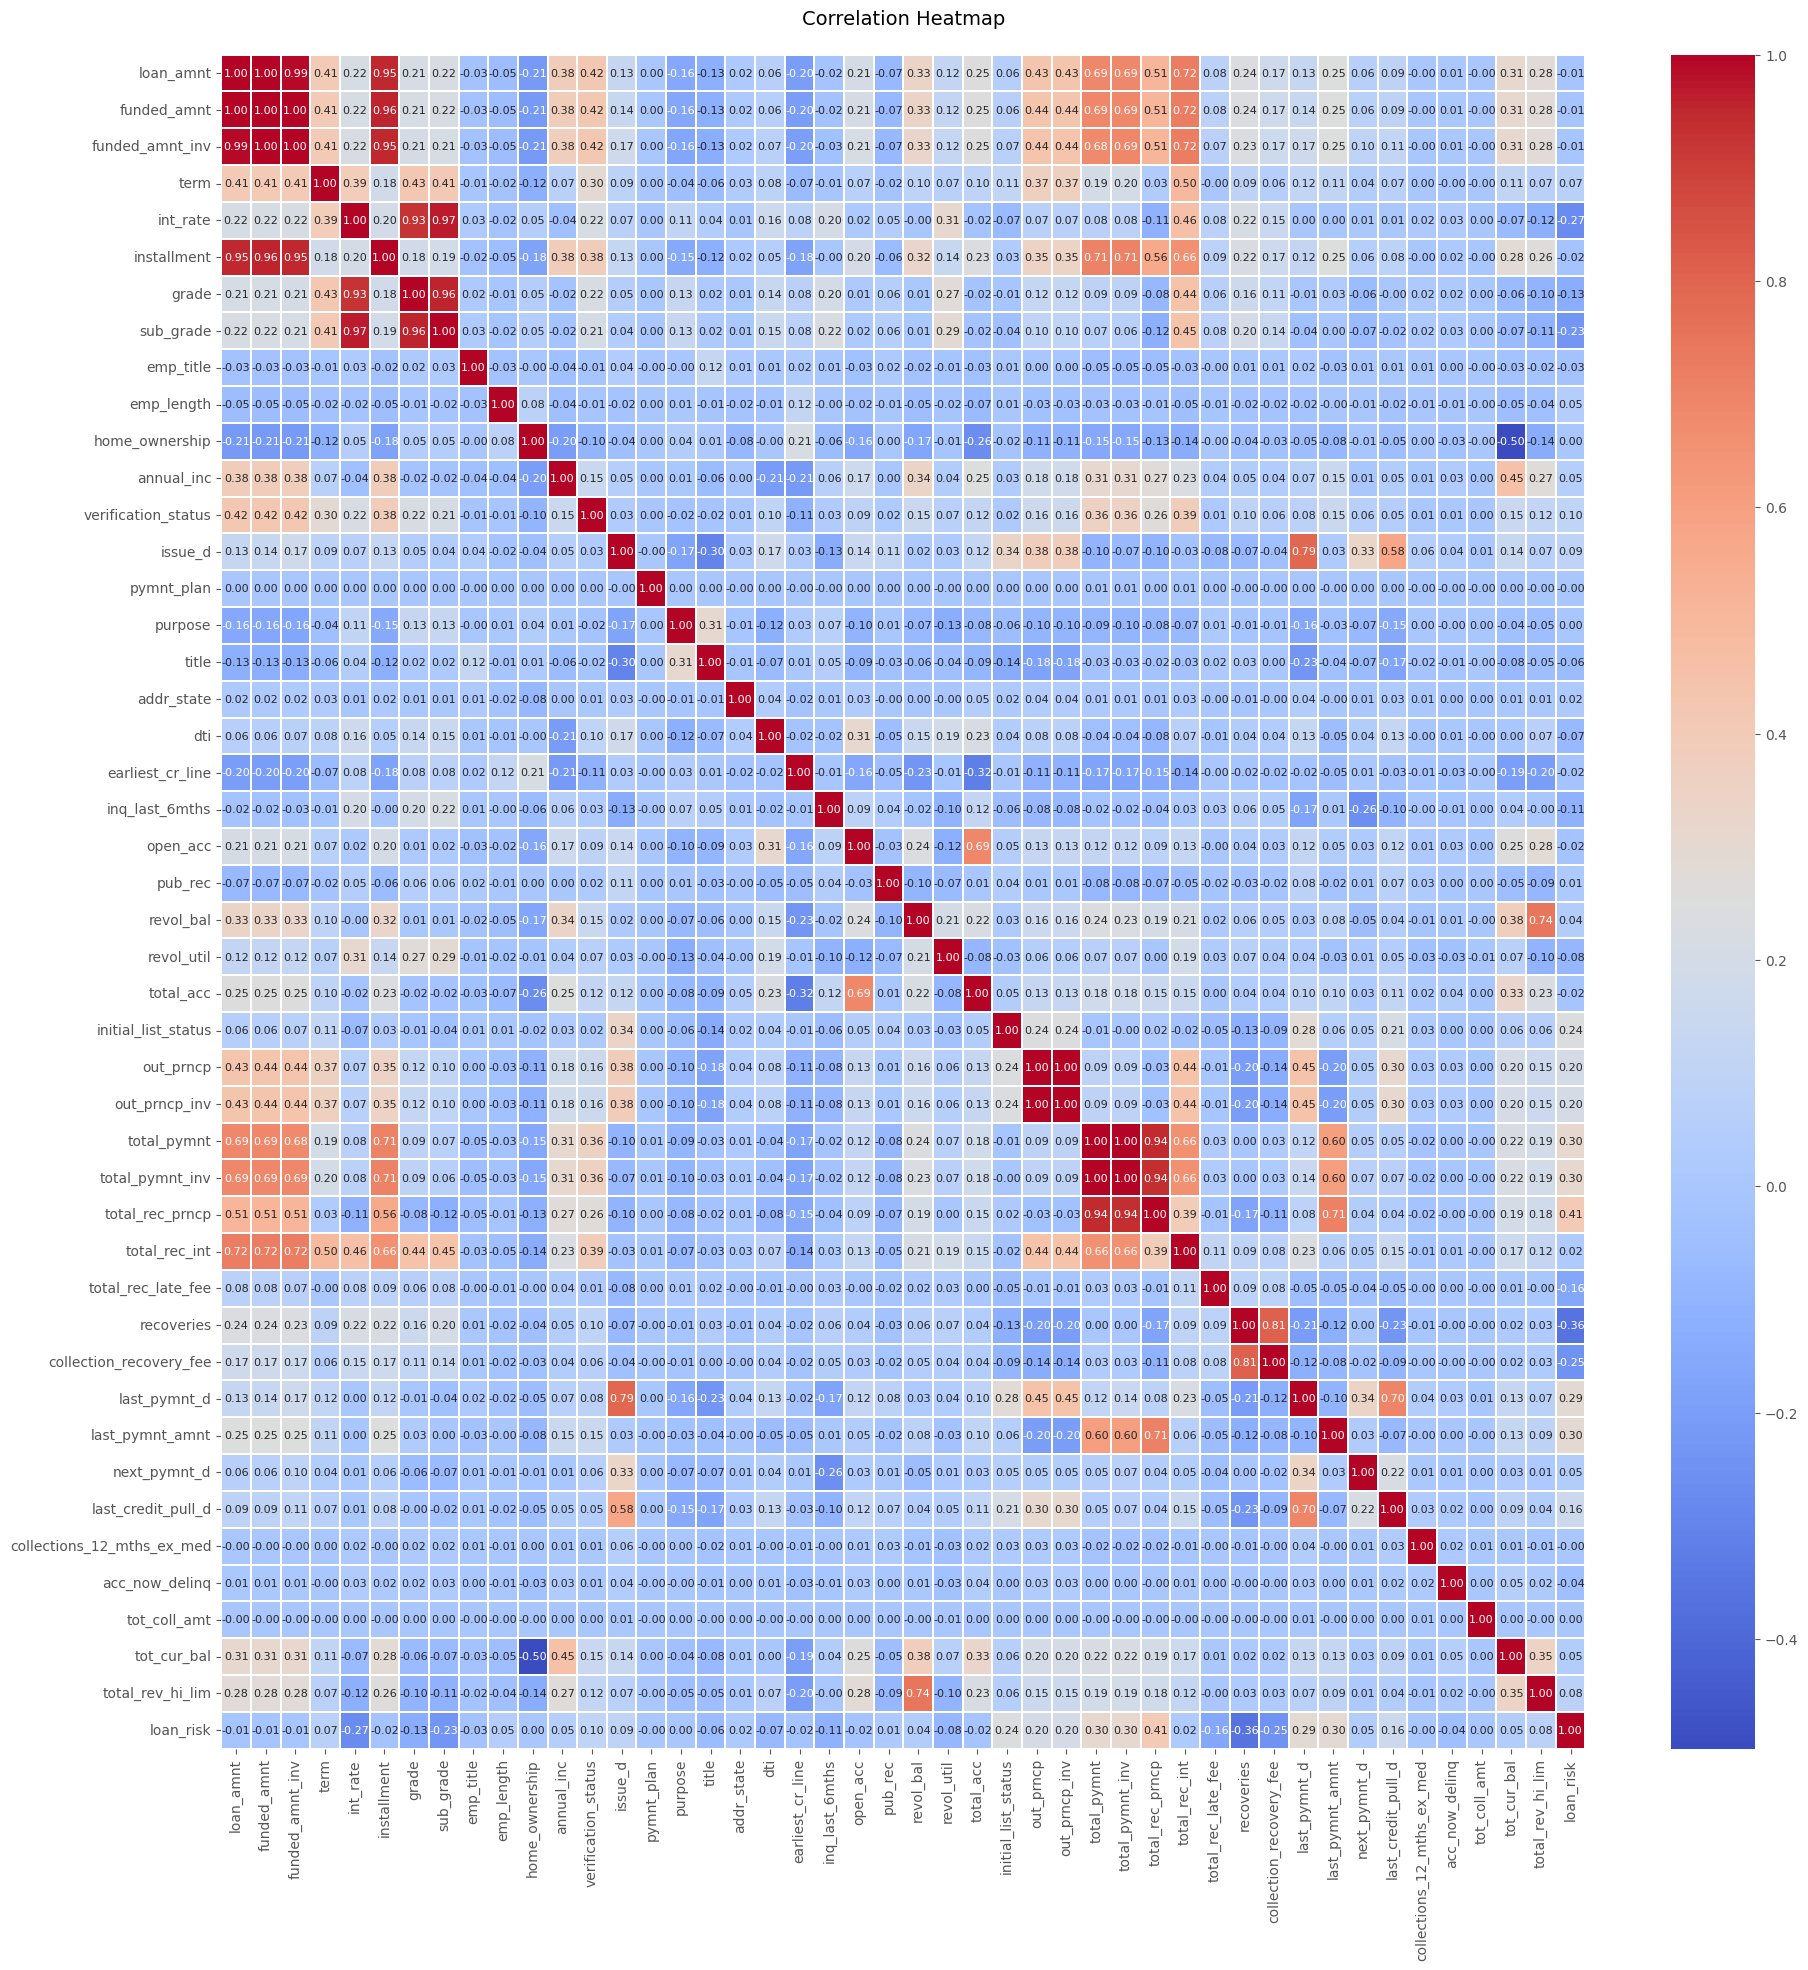

In [43]:
# View the correlation of each column or feature
loan_risk_train = pd.concat([X_train, y_train], axis = 1)
corr = loan_risk_train.corr()

plt.figure(figsize = (22, 22))
heatmap = sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'coolwarm', linewidths = 0.1, annot_kws = {"size": 8})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize = 10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize = 10)
plt.title('Correlation Heatmap\n', fontsize = 14)
plt.show()


Remove columns or features that have high correlation (> 0.8)

In [44]:
X_train = X_train.drop(columns=['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
                                'out_prncp_inv',
                                'total_pymnt_inv',
                                'total_pymnt',
                                'collection_recovery_fee'])
X_test = X_test.drop(columns=['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
                                'out_prncp_inv',
                                'total_pymnt_inv',
                                'total_pymnt',
                                'collection_recovery_fee'])


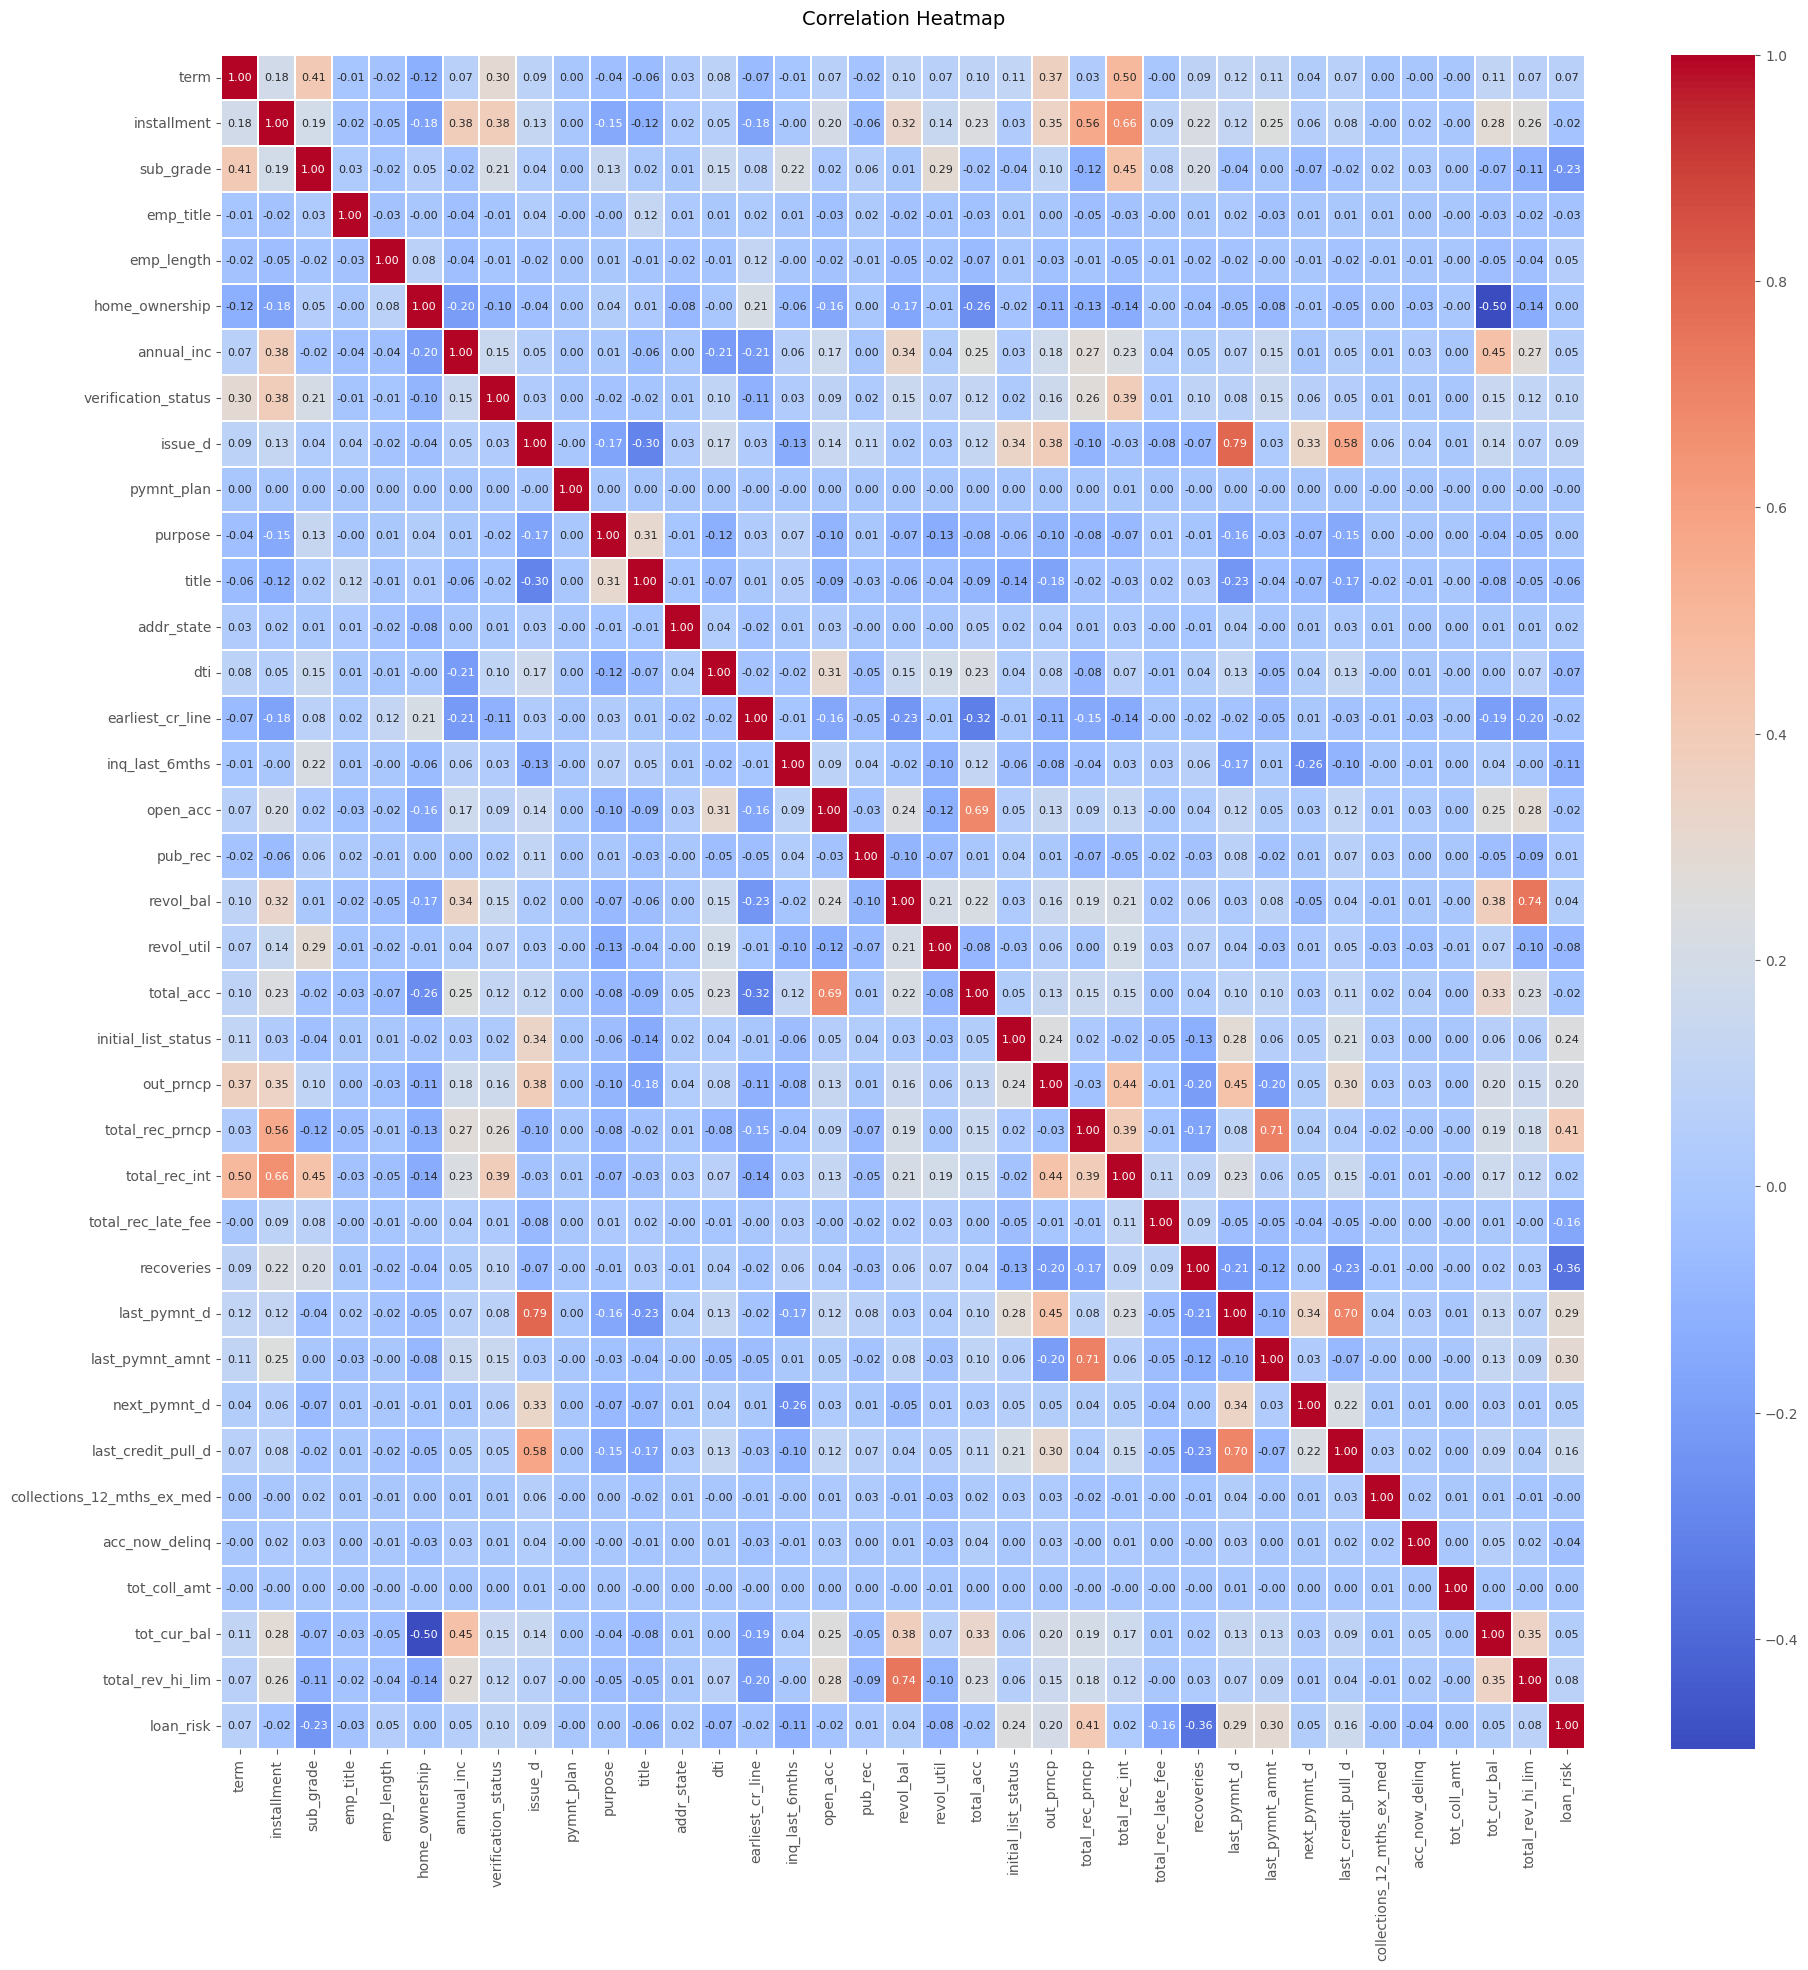

In [60]:
loan_risk_train = pd.concat([X_train, y_train], axis = 1)
corr = loan_risk_train.corr()
plt.figure(figsize = (22, 22))
heatmap = sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'coolwarm', linewidths = 0.1, annot_kws = {"size": 8})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize = 10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize = 10)
plt.title('Correlation Heatmap\n', fontsize = 14)
plt.show()

Remove columns or features that have high correlation (> 0.8).

In [46]:
X_train = X_train.drop(columns=['int_rate','grade'])
X_test = X_test.drop(columns=['int_rate','grade'])

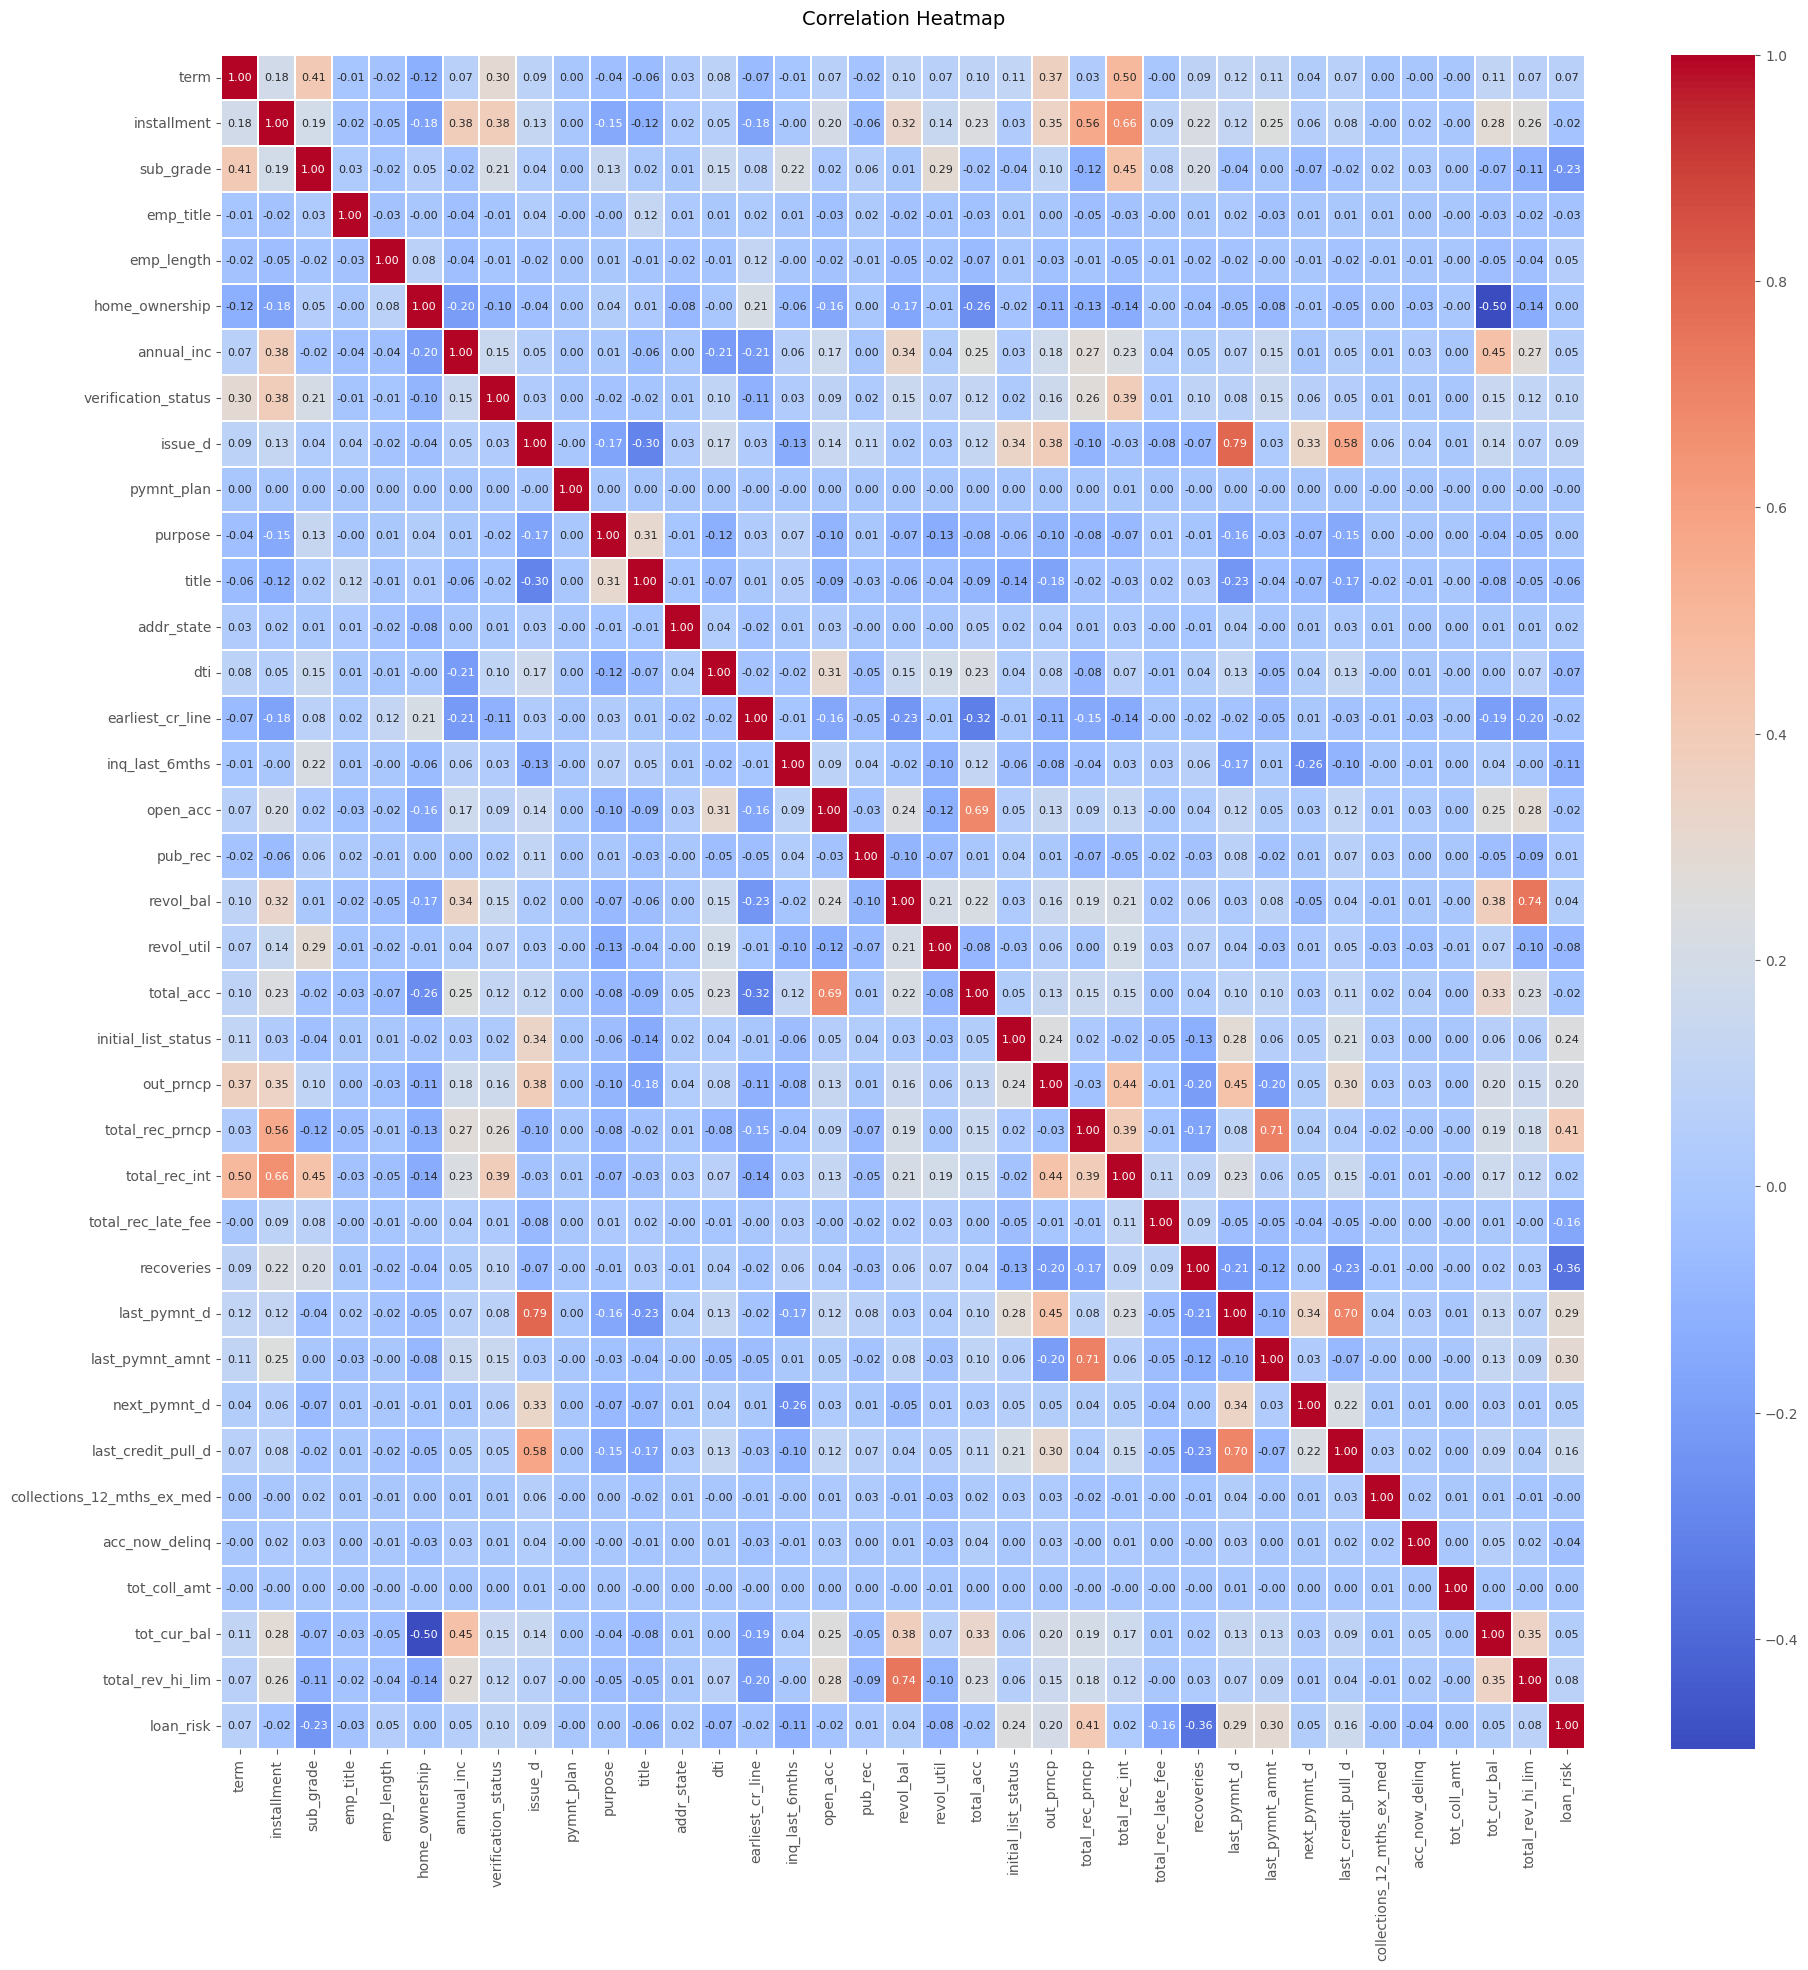

In [47]:
loan_risk_train = pd.concat([X_train, y_train], axis = 1)
corr = loan_risk_train.corr()
plt.figure(figsize = (22, 22))
heatmap = sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'coolwarm', linewidths = 0.1, annot_kws = {"size": 8})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize = 10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize = 10)
plt.title('Correlation Heatmap\n', fontsize = 14)
plt.show()

## Data Standardization

In [48]:
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

# **Machine Learning Models**

In [49]:
def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]

    accuracy = round((tp+tn) / (tp+tn+fp+fn) * 100, 2)
    precision = round((tp) / (tp+fp) * 100, 2)
    recall = round((tp) / (tp+fn) * 100, 2)
    f1_score = round((2* (precision * recall)/(precision + recall)))

    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')
    print('F1_Score   :', f1_score, '%')

##Logistic Regression

In [50]:
lr = LogisticRegression(solver = 'sag')
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [51]:
classification_eval(y_train, y_train_pred, 'Logistic Regression Training')

Evaluation Model: Logistic Regression Training
[[238102  66527]
 [ 68658 236045]]
Accuracy   : 77.81 %
Precision  : 78.01 %
Recall     : 77.47 %
F1_Score   : 78 %


In [52]:
classification_eval(y_test, y_test_pred, 'Logistic Regression Testing')

Evaluation Model: Logistic Regression Testing
[[59499 16705]
 [17083 59047]]
Accuracy   : 77.82 %
Precision  : 77.95 %
Recall     : 77.56 %
F1_Score   : 78 %


##Decision Tree

In [53]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [54]:
classification_eval(y_train, y_train_pred, 'Decision Tree Training')

Evaluation Model: Decision Tree Training
[[264515  40114]
 [  6593 298110]]
Accuracy   : 92.33 %
Precision  : 88.14 %
Recall     : 97.84 %
F1_Score   : 93 %


In [55]:
classification_eval(y_test, y_test_pred, 'Decision Tree Testing')

Evaluation Model: Decision Tree Testing
[[66155 10049]
 [ 1646 74484]]
Accuracy   : 92.32 %
Precision  : 88.11 %
Recall     : 97.84 %
F1_Score   : 93 %


##Random Forest

In [56]:
rf = RandomForestClassifier(max_depth = 5)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [57]:
classification_eval(y_train, y_train_pred, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[264453  40176]
 [  6310 298393]]
Accuracy   : 92.37 %
Precision  : 88.13 %
Recall     : 97.93 %
F1_Score   : 93 %


In [58]:
classification_eval(y_test, y_test_pred, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[66066 10138]
 [ 1523 74607]]
Accuracy   : 92.35 %
Precision  : 88.04 %
Recall     : 98.0 %
F1_Score   : 93 %


# **Machine Learning Model Selection**

In [59]:
ml_selection = pd.DataFrame([["Logistic Regression", 77.81, 77.82],
                       ["Decision Tree", 92.33, 92.32],
                       ["Random Forest", 92.37, 92.35]],
                        columns = ["Machine Learning Models", "Training Accuracy (%)", "Testing Accuracy (%)"])

ml_selection.sort_values(by = ['Training Accuracy (%)', 'Testing Accuracy (%)'], ascending = False)

Machine Learning Models  Training Accuracy (%)  Testing Accuracy (%)
2           Random Forest                  92.37                 92.35
1           Decision Tree                  92.33                 92.32
0     Logistic Regression                  77.81                 77.82

# **Conclusion**

- Comparison of loan risks tends towards good loans. The majority of customers have Current loan status, and can be categorized as Good.

- Loans with a term of 36 months will likely experience a greater risk of bad loans than those with a term of 60 months.

- The Random Forest model is better at analyzing customer loans, with training and testing accuracy of 92.37% and 92.35%.


